In [162]:
# basic modules
import numpy as np
import pandas as pd

# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
%matplotlib inline

import os, shutil

import keras
keras.__version__

'2.3.1'

In [163]:
os.chdir("/Users/vivekkathula/Documents/Competitions/JanataHack_Computer Vision Hackathon/")

full_train=pd.read_csv("janatahack-data/train.csv")
test = pd.read_csv("janatahack-data/test_vc2kHdQ.csv")
sample_submission = pd.read_csv("janatahack-data/sample_submission_yxjOnvz.csv")


In [164]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(full_train, full_train["emergency_or_not"]):
    train = full_train.loc[train_index]
    valid = full_train.loc[test_index]

In [165]:
print(train.head(1))
print(valid.head(1))
print(test.head(1))

    image_names  emergency_or_not
378     720.jpg                 1
     image_names  emergency_or_not
1210    1039.jpg                 0
  image_names
0    1960.jpg


In [184]:
full_train.head(2)

image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0

In [166]:
#unzipped images in original
# base dir exists, but make it empty so we can create folders as below cell

original_images_dir =("/Users/vivekkathula/Documents/Competitions/JanataHack_Computer Vision Hackathon/janatahack-data/images/")
base_dir = ('/Users/vivekkathula/Documents/Competitions/JanataHack_Computer Vision Hackathon/base_dir')


In [168]:
#os.mkdir(base_dir)
# Directories for our training,
# validation and test splits

train_dir = os.path.join(base_dir, 'train_images')
os.mkdir(train_dir)

valid_dir = os.path.join(base_dir, 'valid_images')
os.mkdir(valid_dir)

test_dir = os.path.join(base_dir, 'test_images')
os.mkdir(test_dir)


In [185]:
full_train_dir = os.path.join(base_dir, 'full_train_images')
os.mkdir(full_train_dir)

In [169]:
# Directory with our training Emergency pictures
train_emergency_dir = os.path.join(train_dir, 'emergency_vehicles')
os.mkdir(train_emergency_dir)

# Directory with our training Non emergency pictures
train_non_emergency_dir = os.path.join(train_dir, 'non_emergency')
os.mkdir(train_non_emergency_dir)

valid_emergency_dir = os.path.join(valid_dir, 'emergency_vehicles')
os.mkdir(valid_emergency_dir)

# Directory with our training Non emergency pictures
valid_non_emergency_dir = os.path.join(valid_dir, 'non_emergency')
os.mkdir(valid_non_emergency_dir)

test_images_dir = os.path.join(test_dir, 'images')
os.mkdir(test_images_dir)

In [186]:
# Directory with our training Emergency pictures
full_train_emergency_dir = os.path.join(full_train_dir, 'emergency_vehicles')
os.mkdir(full_train_emergency_dir)

# Directory with our training Non emergency pictures
full_train_non_emergency_dir = os.path.join(full_train_dir, 'non_emergency')
os.mkdir(full_train_non_emergency_dir)

In [170]:
train_non_emergency_fnames=train[train["emergency_or_not"]==0]["image_names"].values
train_emergency_fnames=train[train["emergency_or_not"]==1]["image_names"].values

valid_non_emergency_fnames=valid[valid["emergency_or_not"]==0]["image_names"].values
valid_emergency_fnames=valid[valid["emergency_or_not"]==1]["image_names"].values

test_fnames=test["image_names"].values

In [187]:
full_train_non_emergency_fnames=full_train[full_train["emergency_or_not"]==0]["image_names"].values
full_train_emergency_fnames=full_train[full_train["emergency_or_not"]==1]["image_names"].values

In [171]:
print(train_non_emergency_fnames[1])
print(train_emergency_fnames[1])

print(valid_non_emergency_fnames[1])
print(valid_emergency_fnames[1])

print(test_fnames[1])


1862.jpg
491.jpg
1438.jpg
754.jpg
668.jpg


In [188]:
print(full_train_non_emergency_fnames[1])
print(full_train_emergency_fnames[1])

1420.jpg
294.jpg


In [172]:
original_images_dir

'/Users/vivekkathula/Documents/Competitions/JanataHack_Computer Vision Hackathon/janatahack-data/images/'

In [189]:
fnames = full_train_emergency_fnames
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(full_train_emergency_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = full_train_non_emergency_fnames 
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(full_train_non_emergency_dir, fname)
    shutil.copyfile(src, dst)

In [173]:
fnames = train_emergency_fnames
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(train_emergency_dir, fname)
    shutil.copyfile(src, dst)

In [174]:
fnames = train_non_emergency_fnames 
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(train_non_emergency_dir, fname)
    shutil.copyfile(src, dst)

In [175]:
fnames = valid_emergency_fnames
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(valid_emergency_dir, fname)
    shutil.copyfile(src, dst)

In [176]:
fnames = valid_non_emergency_fnames 
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(valid_non_emergency_dir, fname)
    shutil.copyfile(src, dst)

In [177]:
fnames = test_fnames
for fname in fnames:
    src = os.path.join(original_images_dir, fname)
    dst = os.path.join(test_images_dir, fname)
    shutil.copyfile(src, dst)

In [190]:
print('total full training images:', len(os.listdir(full_train_dir)))
print('total training images:', len(os.listdir(train_dir)))
print('total training images:', len(os.listdir(train_dir)))
print('total test images:', len(os.listdir(test_images_dir)))

total full training images: 2
total training images: 2
total training images: 2
total test images: 706


In [193]:
772+544, 137+193, 681+965

(1316, 330, 1646)

In [192]:
print('total full training Emergency images:', len(os.listdir(full_train_emergency_dir)))
print('total full training Non Emergency images:', len(os.listdir(full_train_non_emergency_dir)))


print('total training Emergency images:', len(os.listdir(train_emergency_dir)))
print('total training Non Emergency images:', len(os.listdir(train_non_emergency_dir)))

total full training Emergency images: 681
total full training Non Emergency images: 965
total training Emergency images: 544
total training Non Emergency images: 772


In [182]:
print('total validation Non Emergency images:', len(os.listdir(valid_emergency_dir)))
print('total validation Non Emergency images:', len(os.listdir(valid_emergency_dir)))
print('total validation Emergency images:', len(os.listdir(valid_non_emergency_dir)))

total validation Non Emergency images: 137
total validation Emergency images: 193


In [183]:
print('total training Emergency images:', len(os.listdir(test_images_dir)))

total training Emergency images: 706


In [20]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1316 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [161]:
1

1

In [143]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [144]:
labels_batch[1]

0.0

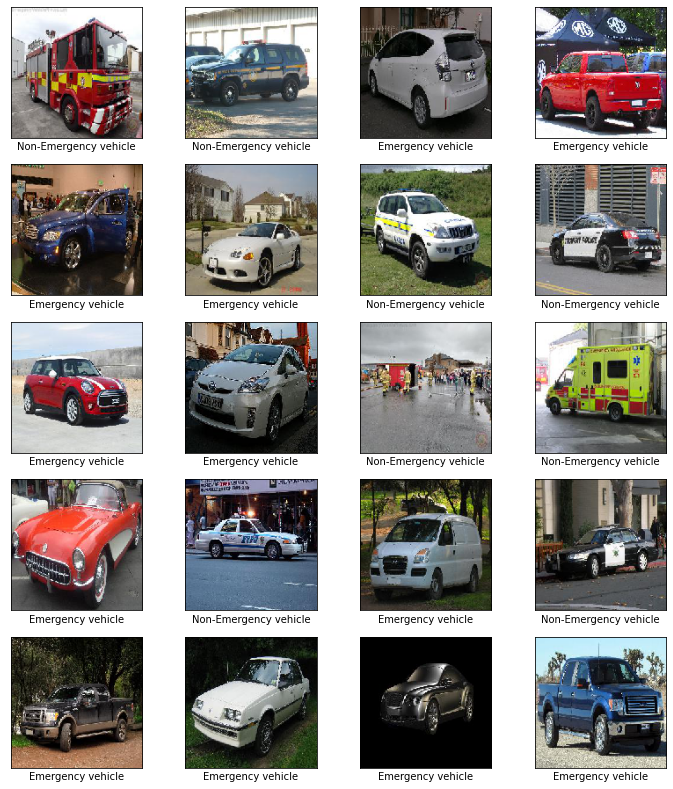

In [146]:
plt.figure(figsize=(12,14))
for i in range(len(data_batch)):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_batch[i])
    # The labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[labels_batch[i].astype(int)])
plt.show()

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 81s 815ms/step - loss: 0.5789 - acc: 0.7018 - val_loss: 0.5477 - val_acc: 0.7327
Epoch 2/30
100/100 [==============================] - 78s 783ms/step - loss: 0.4640 - acc: 0.7821 - val_loss: 0.3150 - val_acc: 0.7897
Epoch 3/30
100/100 [==============================] - 79s 788ms/step - loss: 0.4138 - acc: 0.8236 - val_loss: 0.7248 - val_acc: 0.7784
Epoch 4/30
100/100 [==============================] - 79s 786ms/step - loss: 0.3755 - acc: 0.8283 - val_loss: 0.4161 - val_acc: 0.7948
Epoch 5/30
100/100 [==============================] - 78s 785ms/step - loss: 0.3426 - acc: 0.8459 - val_loss: 0.4841 - val_acc: 0.8031
Epoch 6/30
100/100 [==============================] - 78s 785ms/step - loss: 0.2951 - acc: 0.8833 - val_loss: 0.3377 - val_acc: 0.8000
Epoch 7/30
100/100 [==============================] - 78s 784ms/step - loss: 0.2585 - acc: 0.8958 - val_loss: 0.4427 - val_acc: 0.8340
Epoch 8/30
100/100 [==============================] - 7

In [196]:
history.model.get_weights

<bound method Network.get_weights of <keras.engine.sequential.Sequential object at 0x13c26ac50>>

In [200]:
model.load_weights

<bound method Network.load_weights of <keras.engine.sequential.Sequential object at 0x144a2add0>>

In [98]:
len(train_generator), len(validation_generator)

(66, 17)

In [102]:
for (valid_batch, labels_batch) in (validation_generator):
    break

In [103]:
model.predict_classes(valid_batch)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [111]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=len(test),
                                                  class_mode='binary')

Found 706 images belonging to 1 classes.


In [118]:
for test_features, _ in test_generator:
    break

In [126]:
len(test_features), test_pred.shape

(706, (706, 1))

In [123]:
test_features[1].shape

(150, 150, 3)

In [135]:
test_pred=model.predict_classes(test_features).reshape(len(test_features),)

In [136]:
[test_pred[1]]

[1]

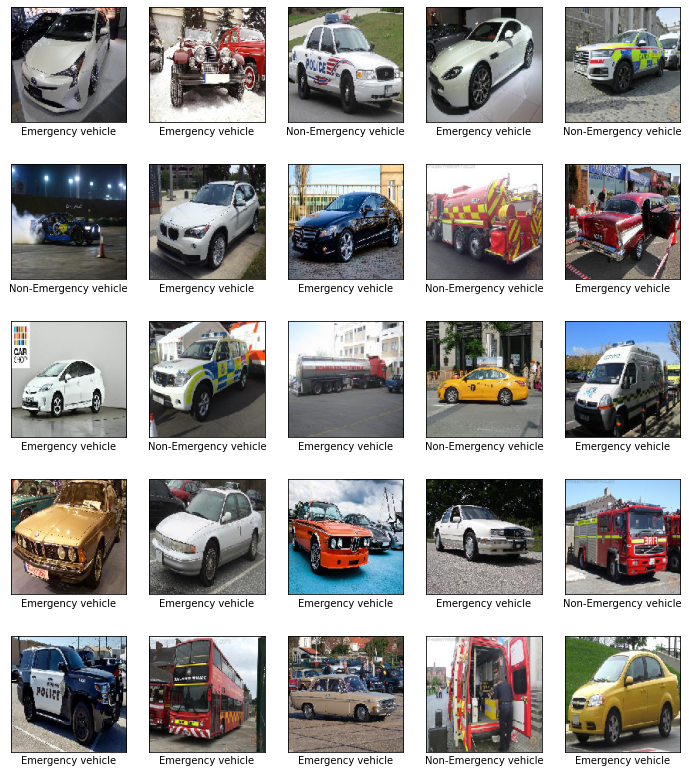

In [137]:
plt.figure(figsize=(12,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_features[i])
    # The labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[test_pred[i]])
plt.show()

In [64]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150))

Found 706 images belonging to 1 classes.


In [83]:
#model.predict_classes(test_generator[22][0][0])  # len is 23


In [81]:
test_generator[22][0][0].shape

(150, 150, 3)

In [147]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

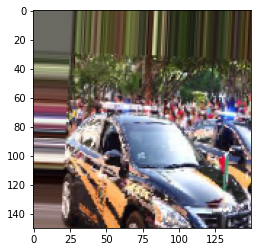

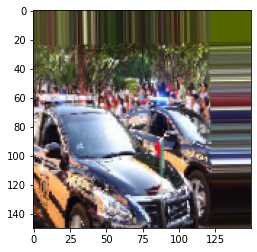

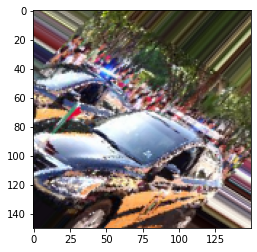

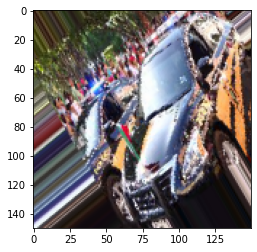

In [149]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_emergency_dir , fname) for fname in os.listdir(train_emergency_dir )]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [150]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [152]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 1316 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [160]:
for i, j in validation_generator:
    

In [158]:
l

array([1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [ ]:
model.save('janata_challenge_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# try data augmentation on colab

In [29]:
for i in validation_generator:
    print(i)

(array([[[[1.        , 0.9843138 , 1.        ],
         [1.        , 0.9843138 , 1.        ],
         [1.        , 0.98823535, 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9450981 , 0.94117653, 0.96470594],
         [0.68235296, 0.6745098 , 0.6862745 ],
         [1.        , 1.        , 0.9921569 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.58431375, 0.5921569 , 0.5882353 ],
         [0.8313726 , 0.8352942 , 0.81568635],
         [0.86274517, 0.86666673, 0.8431373 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.654902  , 0.427451  , 0.34901962],
         [0.6666667 , 0.43921572, 0.36078432

(array([[[[0.4431373 , 0.4431373 , 0.4431373 ],
         [0.8235295 , 0.8235295 , 0.8235295 ],
         [0.43137258, 0.43137258, 0.43137258],
         ...,
         [0.77647066, 0.77647066, 0.77647066],
         [0.7411765 , 0.7411765 , 0.7411765 ],
         [0.5686275 , 0.5686275 , 0.5686275 ]],

        [[0.46274513, 0.46274513, 0.46274513],
         [0.427451  , 0.427451  , 0.427451  ],
         [0.7294118 , 0.7294118 , 0.7294118 ],
         ...,
         [0.7607844 , 0.7607844 , 0.7607844 ],
         [0.73333335, 0.73333335, 0.73333335],
         [0.627451  , 0.627451  , 0.627451  ]],

        [[0.3647059 , 0.3647059 , 0.3647059 ],
         [0.30588236, 0.30588236, 0.30588236],
         [0.73333335, 0.73333335, 0.73333335],
         ...,
         [0.75294125, 0.75294125, 0.75294125],
         [0.7372549 , 0.7372549 , 0.7372549 ],
         [0.6666667 , 0.6666667 , 0.6666667 ]],

        ...,

        [[0.13725491, 0.13725491, 0.13725491],
         [0.12156864, 0.12156864, 0.12156864

(array([[[[0.1137255 , 0.16862746, 0.11764707],
         [0.12156864, 0.1764706 , 0.1254902 ],
         [0.1137255 , 0.16862746, 0.11764707],
         ...,
         [0.34117648, 0.37647063, 0.35686275],
         [0.30980393, 0.34509805, 0.3254902 ],
         [0.3372549 , 0.37254903, 0.3529412 ]],

        [[0.09411766, 0.14901961, 0.09803922],
         [0.12156864, 0.1764706 , 0.1254902 ],
         [0.13333334, 0.18823531, 0.13725491],
         ...,
         [0.32941177, 0.3647059 , 0.3529412 ],
         [0.3019608 , 0.3372549 , 0.3254902 ],
         [0.2627451 , 0.29803923, 0.28627452]],

        [[0.1254902 , 0.1764706 , 0.13725491],
         [0.14901961, 0.20000002, 0.16078432],
         [0.15294118, 0.20392159, 0.16470589],
         ...,
         [0.34509805, 0.3803922 , 0.37647063],
         [0.32156864, 0.35686275, 0.3529412 ],
         [0.27450982, 0.30980393, 0.30588236]],

        ...,

        [[0.43921572, 0.45882356, 0.4431373 ],
         [0.41960788, 0.43921572, 0.42352945

(array([[[[0.5529412 , 0.6666667 , 0.8235295 ],
         [0.5882353 , 0.7019608 , 0.8588236 ],
         [0.5803922 , 0.69411767, 0.85098046],
         ...,
         [0.5019608 , 0.6313726 , 0.8313726 ],
         [0.49411768, 0.62352943, 0.8235295 ],
         [0.48627454, 0.6156863 , 0.81568635]],

        [[0.5686275 , 0.6784314 , 0.8352942 ],
         [0.50980395, 0.61960787, 0.77647066],
         [0.5137255 , 0.62352943, 0.7803922 ],
         ...,
         [0.47058827, 0.6       , 0.8000001 ],
         [0.4666667 , 0.59607846, 0.7960785 ],
         [0.4666667 , 0.59607846, 0.7960785 ]],

        [[0.58431375, 0.68235296, 0.83921576],
         [0.52156866, 0.61960787, 0.77647066],
         [0.5294118 , 0.627451  , 0.7843138 ],
         ...,
         [0.47450984, 0.6039216 , 0.80392164],
         [0.47450984, 0.6039216 , 0.80392164],
         [0.4784314 , 0.60784316, 0.8078432 ]],

        ...,

        [[0.52156866, 0.45882356, 0.35686275],
         [0.43529415, 0.37254903, 0.27058825

(array([[[[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [1.        , 0.97647065, 0.9607844 ],
         [0.9960785 , 0.9215687 , 0.9058824 ],
         [0.7607844 , 0.6392157 , 0.6313726 ]],

        [[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [1.        , 0.98823535, 0.9725491 ],
         [1.        , 0.9568628 , 0.94117653],
         [0.77647066, 0.654902  , 0.64705884]],

        [[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 ],
         ...,
         [1.        , 0.98823535, 0.9725491 ],
         [1.        , 0.97647065, 0.9607844 ],
         [0.83921576, 0.7176471 , 0.70980394]],

        ...,

        [[0.45098042, 0.5058824 , 0.5568628 ],
         [0.4156863 , 0.47058827, 0.5137255 

(array([[[[0.68235296, 0.70980394, 0.8235295 ],
         [0.70980394, 0.7294118 , 0.8431373 ],
         [0.7058824 , 0.7254902 , 0.83921576],
         ...,
         [0.4431373 , 0.34509805, 0.08627451],
         [0.43529415, 0.3372549 , 0.08627451],
         [0.41176474, 0.30980393, 0.07843138]],

        [[0.69411767, 0.72156864, 0.8235295 ],
         [0.64705884, 0.67058825, 0.7725491 ],
         [0.6509804 , 0.6745098 , 0.7686275 ],
         ...,
         [0.27450982, 0.16078432, 0.        ],
         [0.24313727, 0.12941177, 0.        ],
         [0.21960786, 0.10588236, 0.        ]],

        [[0.7019608 , 0.7254902 , 0.8196079 ],
         [0.627451  , 0.6509804 , 0.74509805],
         [0.6431373 , 0.6666667 , 0.75294125],
         ...,
         [0.227451  , 0.1137255 , 0.        ],
         [0.26666668, 0.15294118, 0.        ],
         [0.36078432, 0.24705884, 0.02745098]],

        ...,

        [[0.3019608 , 0.30980393, 0.29803923],
         [0.24313727, 0.2509804 , 0.2392157 

(array([[[[0.20392159, 0.20000002, 0.18431373],
         [0.20000002, 0.19607845, 0.18039216],
         [0.20000002, 0.19607845, 0.18039216],
         ...,
         [0.37254903, 0.37647063, 0.38431376],
         [0.3529412 , 0.35686275, 0.3647059 ],
         [0.34509805, 0.34901962, 0.35686275]],

        [[0.24313727, 0.2392157 , 0.22352943],
         [0.21960786, 0.21568629, 0.20000002],
         [0.227451  , 0.22352943, 0.20784315],
         ...,
         [0.34509805, 0.34901962, 0.35686275],
         [0.32941177, 0.33333334, 0.34117648],
         [0.34509805, 0.34901962, 0.35686275]],

        [[0.2509804 , 0.24705884, 0.23137257],
         [0.20784315, 0.20392159, 0.18823531],
         [0.22352943, 0.21960786, 0.20392159],
         ...,
         [0.34509805, 0.34901962, 0.35686275],
         [0.33333334, 0.3372549 , 0.34509805],
         [0.34509805, 0.34901962, 0.35686275]],

        ...,

        [[0.35686275, 0.30588236, 0.33333334],
         [0.33333334, 0.34117648, 0.32941177

(array([[[[0.56078434, 0.7372549 , 0.9686275 ],
         [0.5803922 , 0.7372549 , 0.9686275 ],
         [0.5921569 , 0.74509805, 0.9686275 ],
         ...,
         [0.5411765 , 0.7058824 , 0.94117653],
         [0.5411765 , 0.69803923, 0.93725497],
         [0.5372549 , 0.6862745 , 0.9294118 ]],

        [[0.5647059 , 0.7411765 , 0.96470594],
         [0.5803922 , 0.74509805, 0.9725491 ],
         [0.5921569 , 0.75294125, 0.9725491 ],
         ...,
         [0.54901963, 0.7058824 , 0.9450981 ],
         [0.5568628 , 0.7058824 , 0.9490197 ],
         [0.5764706 , 0.7176471 , 0.95294124]],

        [[0.5647059 , 0.7490196 , 0.9607844 ],
         [0.5764706 , 0.75294125, 0.9686275 ],
         [0.5882353 , 0.7568628 , 0.9725491 ],
         ...,
         [0.5529412 , 0.70980394, 0.94117653],
         [0.5647059 , 0.7176471 , 0.9490197 ],
         [0.5921569 , 0.73333335, 0.9686275 ]],

        ...,

        [[0.61960787, 0.5803922 , 0.57254905],
         [0.59607846, 0.5568628 , 0.54901963

(array([[[[0.2392157 , 0.227451  , 0.20784315],
         [0.27058825, 0.2509804 , 0.23529413],
         [0.2784314 , 0.25882354, 0.24313727],
         ...,
         [0.07450981, 0.10588236, 0.04705883],
         [0.0627451 , 0.09411766, 0.03529412],
         [0.10588236, 0.13725491, 0.07843138]],

        [[0.25882354, 0.227451  , 0.21568629],
         [0.2627451 , 0.23529413, 0.21176472],
         [0.2509804 , 0.22352943, 0.20000002],
         ...,
         [0.08627451, 0.11764707, 0.05882353],
         [0.08627451, 0.11764707, 0.05882353],
         [0.05490196, 0.08627451, 0.02745098]],

        [[0.18039216, 0.14509805, 0.1254902 ],
         [0.2627451 , 0.227451  , 0.20784315],
         [0.28235295, 0.24705884, 0.227451  ],
         ...,
         [0.09803922, 0.12156864, 0.06666667],
         [0.10980393, 0.13333334, 0.07843138],
         [0.07450981, 0.09803922, 0.04313726]],

        ...,

        [[0.53333336, 0.45882356, 0.34117648],
         [0.5058824 , 0.43137258, 0.3137255 

(array([[[[0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         ...,
         [0.16470589, 0.3647059 , 0.54901963],
         [0.16078432, 0.36078432, 0.54509807],
         [0.16078432, 0.36078432, 0.54509807]],

        [[0.15294118, 0.32941177, 0.49411768],
         [0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         ...,
         [0.1764706 , 0.37647063, 0.56078434],
         [0.1764706 , 0.37647063, 0.56078434],
         [0.17254902, 0.37254903, 0.5568628 ]],

        [[0.15294118, 0.32941177, 0.49411768],
         [0.15686275, 0.33333334, 0.49803925],
         [0.16078432, 0.3372549 , 0.5019608 ],
         ...,
         [0.18039216, 0.3803922 , 0.5647059 ],
         [0.1764706 , 0.37647063, 0.56078434],
         [0.1764706 , 0.37647063, 0.56078434]],

        ...,

        [[0.00784314, 0.01568628, 0.00392157],
         [0.03921569, 0.0509804 , 0.02352941

(array([[[[0.9176471 , 0.9176471 , 0.9176471 ],
         [0.9176471 , 0.9176471 , 0.9176471 ],
         [0.9176471 , 0.9176471 , 0.9176471 ],
         ...,
         [0.7490196 , 0.7725491 , 0.73333335],
         [0.7803922 , 0.8235295 , 0.7686275 ],
         [0.7019608 , 0.7490196 , 0.6627451 ]],

        [[0.9686275 , 0.9686275 , 0.9686275 ],
         [0.9686275 , 0.9686275 , 0.9686275 ],
         [0.9686275 , 0.9686275 , 0.9686275 ],
         ...,
         [0.59607846, 0.62352943, 0.59607846],
         [0.67058825, 0.70980394, 0.6666667 ],
         [0.60784316, 0.654902  , 0.5764706 ]],

        [[0.98823535, 0.98823535, 0.98823535],
         [0.98823535, 0.98823535, 0.98823535],
         [0.98823535, 0.98823535, 0.98823535],
         ...,
         [0.6117647 , 0.64705884, 0.627451  ],
         [0.6627451 , 0.70980394, 0.67058825],
         [0.7372549 , 0.78823537, 0.7176471 ]],

        ...,

        [[0.02745098, 0.05490196, 0.09411766],
         [0.00784314, 0.03529412, 0.07450981

(array([[[[0.8980393 , 0.94117653, 0.9490197 ],
         [0.90196085, 0.9450981 , 0.95294124],
         [0.90196085, 0.9450981 , 0.95294124],
         ...,
         [0.9843138 , 0.9921569 , 0.9803922 ],
         [0.9843138 , 0.9921569 , 0.9803922 ],
         [0.9843138 , 0.9921569 , 0.9803922 ]],

        [[0.8941177 , 0.93725497, 0.9450981 ],
         [0.8980393 , 0.94117653, 0.9490197 ],
         [0.8980393 , 0.94117653, 0.9490197 ],
         ...,
         [0.9843138 , 0.9921569 , 0.9803922 ],
         [0.9843138 , 0.9921569 , 0.9803922 ],
         [0.9843138 , 0.9921569 , 0.9803922 ]],

        [[0.89019614, 0.9333334 , 0.94117653],
         [0.8941177 , 0.93725497, 0.9450981 ],
         [0.8941177 , 0.93725497, 0.9450981 ],
         ...,
         [0.9803922 , 0.98823535, 0.97647065],
         [0.9803922 , 0.98823535, 0.97647065],
         [0.9803922 , 0.98823535, 0.97647065]],

        ...,

        [[0.43921572, 0.43529415, 0.41960788],
         [0.44705886, 0.4431373 , 0.427451  

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ]],

        ...,

        [[0.38431376, 0.38823533, 0.36862746],
         [0.45098042, 0.454902  , 0.43529415

(array([[[[0.54509807, 0.60784316, 0.42352945],
         [0.28627452, 0.34901962, 0.16470589],
         [0.22352943, 0.29411766, 0.10588236],
         ...,
         [0.54509807, 0.5411765 , 0.52156866],
         [0.34901962, 0.3372549 , 0.31764707],
         [0.52156866, 0.5019608 , 0.48627454]],

        [[0.2509804 , 0.31764707, 0.14117648],
         [0.11764707, 0.18431373, 0.00784314],
         [0.29411766, 0.36078432, 0.18431373],
         ...,
         [0.28627452, 0.28627452, 0.25490198],
         [0.32156864, 0.30980393, 0.28235295],
         [0.44705886, 0.427451  , 0.4039216 ]],

        [[0.27450982, 0.34901962, 0.17254902],
         [0.28627452, 0.36078432, 0.18431373],
         [0.28627452, 0.36078432, 0.18431373],
         ...,
         [0.30980393, 0.29803923, 0.2627451 ],
         [0.21568629, 0.20000002, 0.16470589],
         [0.5254902 , 0.49803925, 0.4666667 ]],

        ...,

        [[0.47450984, 0.5019608 , 0.53333336],
         [0.454902  , 0.48235297, 0.5137255 

(array([[[[0.21568629, 0.24313727, 0.17254902],
         [0.10196079, 0.12941177, 0.06666667],
         [0.09803922, 0.12156864, 0.06666667],
         ...,
         [0.16470589, 0.20000002, 0.07843138],
         [0.2509804 , 0.2901961 , 0.15686275],
         [0.2784314 , 0.31764707, 0.18431373]],

        [[0.15686275, 0.18823531, 0.09803922],
         [0.16078432, 0.19215688, 0.10980393],
         [0.19607845, 0.227451  , 0.14509805],
         ...,
         [0.30980393, 0.34509805, 0.22352943],
         [0.27058825, 0.30588236, 0.18431373],
         [0.15686275, 0.19607845, 0.0627451 ]],

        [[0.21176472, 0.24705884, 0.14117648],
         [0.16078432, 0.19215688, 0.09803922],
         [0.16862746, 0.20000002, 0.10980393],
         ...,
         [0.2901961 , 0.3254902 , 0.20392159],
         [0.2509804 , 0.28627452, 0.16470589],
         [0.1254902 , 0.16078432, 0.03921569]],

        ...,

        [[0.86274517, 0.83921576, 0.8470589 ],
         [0.8470589 , 0.8235295 , 0.8313726 

(array([[[[0.16862746, 0.26666668, 0.19215688],
         [0.13333334, 0.227451  , 0.16470589],
         [0.11764707, 0.21176472, 0.15686275],
         ...,
         [0.07058824, 0.16470589, 0.07843138],
         [0.05490196, 0.14901961, 0.0627451 ],
         [0.09411766, 0.18823531, 0.10196079]],

        [[0.15686275, 0.27058825, 0.14901961],
         [0.13725491, 0.2509804 , 0.14117648],
         [0.09411766, 0.20392159, 0.10588236],
         ...,
         [0.07843138, 0.16078432, 0.08627451],
         [0.07843138, 0.16078432, 0.08627451],
         [0.09411766, 0.18431373, 0.10588236]],

        [[0.16078432, 0.28627452, 0.1254902 ],
         [0.16862746, 0.29411766, 0.14901961],
         [0.14509805, 0.2627451 , 0.12941177],
         ...,
         [0.07058824, 0.14117648, 0.07843138],
         [0.07450981, 0.15686275, 0.09019608],
         [0.1254902 , 0.20784315, 0.14117648]],

        ...,

        [[0.7137255 , 0.7843138 , 0.63529414],
         [0.72156864, 0.78823537, 0.64705884

(array([[[[0.60784316, 0.64705884, 0.6509804 ],
         [0.6313726 , 0.67058825, 0.6745098 ],
         [0.62352943, 0.6627451 , 0.6666667 ],
         ...,
         [0.8588236 , 0.85098046, 0.8705883 ],
         [0.8588236 , 0.85098046, 0.8705883 ],
         [0.8588236 , 0.85098046, 0.8705883 ]],

        [[0.6156863 , 0.654902  , 0.65882355],
         [0.5921569 , 0.6313726 , 0.63529414],
         [0.6       , 0.6392157 , 0.6431373 ],
         ...,
         [0.86274517, 0.854902  , 0.8745099 ],
         [0.8588236 , 0.85098046, 0.8705883 ],
         [0.8588236 , 0.85098046, 0.8705883 ]],

        [[0.627451  , 0.6666667 , 0.67058825],
         [0.57254905, 0.6117647 , 0.6156863 ],
         [0.5882353 , 0.627451  , 0.6313726 ],
         ...,
         [0.8588236 , 0.85098046, 0.8705883 ],
         [0.8588236 , 0.85098046, 0.8705883 ],
         [0.854902  , 0.8470589 , 0.86666673]],

        ...,

        [[0.48235297, 0.4666667 , 0.47058827],
         [0.5686275 , 0.5529412 , 0.5568628 

(array([[[[0.20784315, 0.20392159, 0.19607845],
         [0.23137257, 0.22352943, 0.227451  ],
         [0.35686275, 0.34901962, 0.3529412 ],
         ...,
         [0.40000004, 0.41176474, 0.43137258],
         [0.43529415, 0.44705886, 0.4666667 ],
         [0.4901961 , 0.5019608 , 0.52156866]],

        [[0.14509805, 0.13725491, 0.14901961],
         [0.16078432, 0.15686275, 0.1764706 ],
         [0.16862746, 0.16470589, 0.18431373],
         ...,
         [0.5686275 , 0.5803922 , 0.6       ],
         [0.5568628 , 0.5686275 , 0.5882353 ],
         [0.5411765 , 0.5529412 , 0.57254905]],

        [[0.23137257, 0.227451  , 0.2509804 ],
         [0.23529413, 0.23137257, 0.25490198],
         [0.19607845, 0.19215688, 0.21568629],
         ...,
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.60784316, 0.61960787, 0.6392157 ]],

        ...,

        [[0.49411768, 0.49803925, 0.5058824 ],
         [0.4784314 , 0.48235297, 0.4901961 

(array([[[[0.3019608 , 0.30588236, 0.28235295],
         [0.32156864, 0.3254902 , 0.3019608 ],
         [0.3647059 , 0.36862746, 0.34901962],
         ...,
         [0.36078432, 0.38823533, 0.31764707],
         [0.3372549 , 0.3647059 , 0.29411766],
         [0.01176471, 0.02745098, 0.        ]],

        [[0.44705886, 0.45098042, 0.427451  ],
         [0.5176471 , 0.52156866, 0.49803925],
         [0.39607847, 0.40000004, 0.3803922 ],
         ...,
         [0.16862746, 0.18431373, 0.11764707],
         [0.4784314 , 0.5058824 , 0.43529415],
         [0.07450981, 0.10588236, 0.02352941]],

        [[0.23529413, 0.2392157 , 0.21568629],
         [0.3254902 , 0.32941177, 0.30588236],
         [0.36862746, 0.37254903, 0.3529412 ],
         ...,
         [0.21176472, 0.227451  , 0.16078432],
         [0.14901961, 0.1764706 , 0.10588236],
         [0.47058827, 0.5019608 , 0.41960788]],

        ...,

        [[0.2901961 , 0.28627452, 0.2784314 ],
         [0.34901962, 0.34509805, 0.3372549 

(array([[[[0.92549026, 0.92549026, 0.92549026],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.67058825, 0.67058825, 0.67058825],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9803922 , 0.9803922 , 0.9803922 ],
         [0.40784317, 0.40784317, 0.40784317],
         [0.8313726 , 0.8313726 , 0.8313726 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9450981 , 0.9450981 , 0.9450981 ],
         [0.6392157 , 0.6392157 , 0.6392157 ],
         [0.97647065, 0.97647065, 0.97647065],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.1764706 , 0.1764706 , 0.1764706 ],
         [0.18039216, 0.18039216, 0.18039216

(array([[[[0.41176474, 0.28627452, 0.32941177],
         [0.3921569 , 0.26666668, 0.30980393],
         [0.29411766, 0.16862746, 0.21176472],
         ...,
         [0.21176472, 0.20000002, 0.0627451 ],
         [0.24313727, 0.227451  , 0.1137255 ],
         [0.2784314 , 0.27058825, 0.10980393]],

        [[0.38823533, 0.25882354, 0.29411766],
         [0.427451  , 0.29803923, 0.33333334],
         [0.33333334, 0.20392159, 0.2392157 ],
         ...,
         [0.3529412 , 0.34117648, 0.21960786],
         [0.43921572, 0.427451  , 0.30588236],
         [0.38823533, 0.3803922 , 0.18823531]],

        [[0.4039216 , 0.27450982, 0.30980393],
         [0.4156863 , 0.27450982, 0.3137255 ],
         [0.32156864, 0.19215688, 0.227451  ],
         ...,
         [0.3803922 , 0.36078432, 0.24313727],
         [0.3803922 , 0.36078432, 0.24313727],
         [0.3647059 , 0.36078432, 0.14117648]],

        ...,

        [[0.7058824 , 0.6901961 , 0.7568628 ],
         [0.6666667 , 0.6509804 , 0.7176471 

(array([[[[0.6039216 , 0.5019608 , 0.45098042],
         [0.53333336, 0.43137258, 0.3803922 ],
         [0.48235297, 0.3803922 , 0.32941177],
         ...,
         [0.37254903, 0.3019608 , 0.24705884],
         [0.4039216 , 0.33333334, 0.2784314 ],
         [0.3137255 , 0.24313727, 0.18823531]],

        [[0.427451  , 0.3254902 , 0.27450982],
         [0.5372549 , 0.43529415, 0.38431376],
         [0.5921569 , 0.4901961 , 0.43921572],
         ...,
         [0.4039216 , 0.32941177, 0.27450982],
         [0.39607847, 0.30980393, 0.25882354],
         [0.33333334, 0.24705884, 0.19607845]],

        [[0.57254905, 0.47058827, 0.41960788],
         [0.49411768, 0.3921569 , 0.34117648],
         [0.47058827, 0.36862746, 0.31764707],
         ...,
         [0.3803922 , 0.29411766, 0.24313727],
         [0.40000004, 0.3137255 , 0.2627451 ],
         [0.3647059 , 0.27058825, 0.22352943]],

        ...,

        [[0.6509804 , 0.65882355, 0.6039216 ],
         [0.6509804 , 0.65882355, 0.6039216 

(array([[[[0.454902  , 0.45098042, 0.48235297],
         [0.1254902 , 0.12156864, 0.15294118],
         [0.01568628, 0.01176471, 0.04313726],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255],
         [0.02745098, 0.02745098, 0.02745098]],

        [[0.05882353, 0.05490196, 0.07843138],
         [0.14509805, 0.14117648, 0.16470589],
         [0.21960786, 0.21568629, 0.2392157 ],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255],
         [0.02745098, 0.02745098, 0.02745098]],

        [[0.08627451, 0.08235294, 0.10196079],
         [0.07843138, 0.07450981, 0.09411766],
         [0.10588236, 0.10196079, 0.12156864],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255],
         [0.02745098, 0.02745098, 0.02745098]],

        ...,

        [[0.08235294, 0.05882353, 0.07450981],
         [0.08235294, 0.06666667, 0.0627451 

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.34901962, 0.19607845, 0.12941177],
         [0.3254902 , 0.17254902, 0.10588236],
         [0.49803925, 0.34509805, 0.2784314 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.32156864, 0.16862746, 0.10196079],
         [0.4431373 , 0.2901961 , 0.22352943],
         [0.4431373 , 0.2901961 , 0.22352943]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.3529412 , 0.20000002, 0.13333334],
         [0.3019608 , 0.14901961, 0.08235294],
         [0.27058825, 0.11764707, 0.0509804 ]],

        ...,

        [[1.        , 0.98823535, 0.93725497],
         [0.8980393 , 0.8352942 , 0.7843138 

(array([[[[0.6509804 , 0.6313726 , 0.60784316],
         [0.6509804 , 0.6313726 , 0.60784316],
         [0.6509804 , 0.6313726 , 0.60784316],
         ...,
         [0.05882353, 0.06666667, 0.04705883],
         [0.0509804 , 0.05882353, 0.03921569],
         [0.09019608, 0.09803922, 0.07843138]],

        [[0.7137255 , 0.69411767, 0.6784314 ],
         [0.6862745 , 0.6666667 , 0.6509804 ],
         [0.6745098 , 0.654902  , 0.6392157 ],
         ...,
         [0.07843138, 0.08627451, 0.06666667],
         [0.05882353, 0.06666667, 0.04705883],
         [0.0509804 , 0.05882353, 0.03921569]],

        [[0.8352942 , 0.8235295 , 0.80392164],
         [0.7686275 , 0.7568628 , 0.7372549 ],
         [0.8431373 , 0.8313726 , 0.8117648 ],
         ...,
         [0.07058824, 0.07843138, 0.05882353],
         [0.05490196, 0.0627451 , 0.04313726],
         [0.04705883, 0.05490196, 0.03529412]],

        ...,

        [[0.3372549 , 0.33333334, 0.3254902 ],
         [0.3254902 , 0.32156864, 0.3137255 

(array([[[[0.64705884, 0.6117647 , 0.58431375],
         [0.5647059 , 0.5372549 , 0.5137255 ],
         [0.9803922 , 0.9607844 , 0.9450981 ],
         ...,
         [0.47058827, 0.454902  , 0.45098042],
         [0.6156863 , 0.59607846, 0.58431375],
         [0.8862746 , 0.86666673, 0.85098046]],

        [[0.5686275 , 0.53333336, 0.5058824 ],
         [0.5372549 , 0.50980395, 0.48627454],
         [0.9686275 , 0.9490197 , 0.9333334 ],
         ...,
         [1.        , 0.9960785 , 0.9921569 ],
         [0.8941177 , 0.8745099 , 0.86274517],
         [0.43921572, 0.41960788, 0.4039216 ]],

        [[0.5254902 , 0.4901961 , 0.46274513],
         [0.5294118 , 0.5019608 , 0.4784314 ],
         [0.96470594, 0.9450981 , 0.9294118 ],
         ...,
         [0.91372555, 0.8980393 , 0.8941177 ],
         [1.        , 0.9960785 , 0.9843138 ],
         [0.96470594, 0.9450981 , 0.9294118 ]],

        ...,

        [[0.04705883, 0.04705883, 0.04705883],
         [0.0509804 , 0.0509804 , 0.0509804 

(array([[[[0.29411766, 0.33333334, 0.23529413],
         [0.24313727, 0.28235295, 0.18823531],
         [0.16862746, 0.20392159, 0.12156864],
         ...,
         [0.78823537, 0.8196079 , 0.82745105],
         [0.6784314 , 0.70980394, 0.7176471 ],
         [0.75294125, 0.79215693, 0.7960785 ]],

        [[0.32941177, 0.36862746, 0.27058825],
         [0.19607845, 0.23529413, 0.14117648],
         [0.18823531, 0.22352943, 0.14117648],
         ...,
         [0.75294125, 0.75294125, 0.75294125],
         [0.73333335, 0.7411765 , 0.7372549 ],
         [0.7803922 , 0.7960785 , 0.79215693]],

        [[0.29411766, 0.33333334, 0.2392157 ],
         [0.16862746, 0.20392159, 0.12156864],
         [0.19215688, 0.227451  , 0.15294118],
         ...,
         [0.6745098 , 0.70980394, 0.6901961 ],
         [0.74509805, 0.78823537, 0.76470596],
         [0.6745098 , 0.7254902 , 0.69803923]],

        ...,

        [[0.34509805, 0.3647059 , 0.3803922 ],
         [0.37254903, 0.3921569 , 0.40784317

(array([[[[0.6862745 , 0.654902  , 0.5137255 ],
         [0.7372549 , 0.68235296, 0.5686275 ],
         [0.77647066, 0.70980394, 0.60784316],
         ...,
         [0.03137255, 0.03921569, 0.02745098],
         [0.03137255, 0.03921569, 0.03529412],
         [0.05490196, 0.0627451 , 0.05882353]],

        [[0.7019608 , 0.6862745 , 0.57254905],
         [0.75294125, 0.7254902 , 0.62352943],
         [0.6509804 , 0.60784316, 0.52156866],
         ...,
         [0.04313726, 0.04313726, 0.03529412],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.07843138, 0.08627451, 0.08235294]],

        [[0.73333335, 0.73333335, 0.6392157 ],
         [0.7137255 , 0.7058824 , 0.62352943],
         [0.70980394, 0.68235296, 0.6117647 ],
         ...,
         [0.04705883, 0.04313726, 0.03529412],
         [0.07058824, 0.07058824, 0.07058824],
         [0.07843138, 0.07843138, 0.07843138]],

        ...,

        [[0.6156863 , 0.65882355, 0.68235296],
         [0.63529414, 0.6784314 , 0.7019608 

(array([[[[0.5803922 , 0.61960787, 0.6666667 ],
         [0.5882353 , 0.627451  , 0.6745098 ],
         [0.58431375, 0.6313726 , 0.6784314 ],
         ...,
         [0.9843138 , 1.        , 1.        ],
         [0.9725491 , 1.        , 1.        ],
         [0.86274517, 0.8980393 , 0.92549026]],

        [[0.5803922 , 0.61960787, 0.6666667 ],
         [0.5882353 , 0.627451  , 0.6745098 ],
         [0.58431375, 0.6313726 , 0.6784314 ],
         ...,
         [0.9843138 , 1.        , 1.        ],
         [0.9725491 , 1.        , 1.        ],
         [0.86274517, 0.8980393 , 0.92549026]],

        [[0.5803922 , 0.61960787, 0.6666667 ],
         [0.5882353 , 0.627451  , 0.6745098 ],
         [0.58431375, 0.6313726 , 0.6784314 ],
         ...,
         [0.9843138 , 1.        , 1.        ],
         [0.9686275 , 0.9960785 , 1.        ],
         [0.8588236 , 0.8941177 , 0.9215687 ]],

        ...,

        [[0.30980393, 0.30980393, 0.3019608 ],
         [0.3254902 , 0.3254902 , 0.31764707

(array([[[[0.8745099 , 0.87843144, 0.8980393 ],
         [0.87843144, 0.882353  , 0.90196085],
         [0.882353  , 0.8862746 , 0.9058824 ],
         ...,
         [0.7686275 , 0.7843138 , 0.82745105],
         [0.76470596, 0.7803922 , 0.8235295 ],
         [0.75294125, 0.7686275 , 0.8117648 ]],

        [[0.8705883 , 0.8745099 , 0.8941177 ],
         [0.8745099 , 0.87843144, 0.8980393 ],
         [0.882353  , 0.8862746 , 0.9058824 ],
         ...,
         [0.7686275 , 0.7843138 , 0.82745105],
         [0.7607844 , 0.77647066, 0.8196079 ],
         [0.75294125, 0.7686275 , 0.8117648 ]],

        [[0.86666673, 0.8705883 , 0.89019614],
         [0.8745099 , 0.87843144, 0.8980393 ],
         [0.87843144, 0.882353  , 0.90196085],
         ...,
         [0.76470596, 0.7803922 , 0.8235295 ],
         [0.7607844 , 0.77647066, 0.8196079 ],
         [0.7490196 , 0.76470596, 0.8078432 ]],

        ...,

        [[0.3137255 , 0.29411766, 0.28235295],
         [0.3647059 , 0.34509805, 0.33333334

(array([[[[0.5411765 , 0.5294118 , 0.49411768],
         [0.37647063, 0.3647059 , 0.32941177],
         [0.46274513, 0.45098042, 0.4156863 ],
         ...,
         [0.882353  , 0.91372555, 0.9215687 ],
         [0.8862746 , 0.9176471 , 0.92549026],
         [0.8862746 , 0.9176471 , 0.92549026]],

        [[0.41176474, 0.41176474, 0.37254903],
         [0.3254902 , 0.3254902 , 0.28627452],
         [0.34117648, 0.34117648, 0.3019608 ],
         ...,
         [0.87843144, 0.909804  , 0.9215687 ],
         [0.882353  , 0.91372555, 0.92549026],
         [0.882353  , 0.91372555, 0.92549026]],

        [[0.5019608 , 0.50980395, 0.4666667 ],
         [0.4156863 , 0.42352945, 0.3803922 ],
         [0.40000004, 0.40784317, 0.3647059 ],
         ...,
         [0.8745099 , 0.909804  , 0.9294118 ],
         [0.8745099 , 0.909804  , 0.9294118 ],
         [0.8745099 , 0.909804  , 0.9294118 ]],

        ...,

        [[0.6745098 , 0.68235296, 0.6627451 ],
         [0.72156864, 0.7294118 , 0.7176471 

(array([[[[0.32941177, 0.29411766, 0.26666668],
         [0.6       , 0.5647059 , 0.54509807],
         [0.6156863 , 0.5803922 , 0.56078434],
         ...,
         [0.2392157 , 0.21960786, 0.24705884],
         [0.02745098, 0.02352941, 0.07843138],
         [0.1254902 , 0.15686275, 0.2392157 ]],

        [[0.3019608 , 0.27450982, 0.24313727],
         [0.3254902 , 0.29803923, 0.27450982],
         [0.3372549 , 0.30980393, 0.28627452],
         ...,
         [0.20392159, 0.19215688, 0.21960786],
         [0.2901961 , 0.29803923, 0.34901962],
         [0.        , 0.00392157, 0.08235294]],

        [[0.30588236, 0.2784314 , 0.24705884],
         [0.3254902 , 0.29803923, 0.27450982],
         [0.3137255 , 0.28627452, 0.2627451 ],
         ...,
         [0.2392157 , 0.23529413, 0.25882354],
         [0.67058825, 0.6862745 , 0.73333335],
         [0.14509805, 0.19607845, 0.2627451 ]],

        ...,

        [[0.56078434, 0.5137255 , 0.5137255 ],
         [0.5647059 , 0.5176471 , 0.5254902 

(array([[[[0.24705884, 0.48235297, 0.7568628 ],
         [0.24705884, 0.48235297, 0.7568628 ],
         [0.24705884, 0.48235297, 0.7568628 ],
         ...,
         [0.14901961, 0.30980393, 0.5686275 ],
         [0.14509805, 0.30588236, 0.5647059 ],
         [0.14509805, 0.30588236, 0.5647059 ]],

        [[0.24313727, 0.4784314 , 0.75294125],
         [0.24313727, 0.4784314 , 0.75294125],
         [0.24313727, 0.4784314 , 0.75294125],
         ...,
         [0.14117648, 0.3137255 , 0.5686275 ],
         [0.14901961, 0.30980393, 0.5686275 ],
         [0.14509805, 0.30588236, 0.5647059 ]],

        [[0.24313727, 0.4784314 , 0.75294125],
         [0.24313727, 0.4784314 , 0.75294125],
         [0.24313727, 0.4784314 , 0.75294125],
         ...,
         [0.14509805, 0.31764707, 0.57254905],
         [0.14117648, 0.3137255 , 0.5686275 ],
         [0.14901961, 0.30980393, 0.5686275 ]],

        ...,

        [[0.61960787, 0.454902  , 0.30588236],
         [0.62352943, 0.4666667 , 0.3254902 

(array([[[[0.19215688, 0.19215688, 0.14509805],
         [0.25490198, 0.25490198, 0.21568629],
         [0.30588236, 0.30588236, 0.27450982],
         ...,
         [0.67058825, 0.63529414, 0.654902  ],
         [0.5647059 , 0.52156866, 0.54509807],
         [0.61960787, 0.5686275 , 0.59607846]],

        [[0.20784315, 0.20784315, 0.16078432],
         [0.24705884, 0.24705884, 0.20784315],
         [0.24705884, 0.24705884, 0.21568629],
         ...,
         [0.6392157 , 0.62352943, 0.627451  ],
         [0.6666667 , 0.6509804 , 0.654902  ],
         [0.6392157 , 0.62352943, 0.627451  ]],

        [[0.19215688, 0.19215688, 0.14509805],
         [0.227451  , 0.227451  , 0.18823531],
         [0.21176472, 0.21176472, 0.18039216],
         ...,
         [0.6156863 , 0.60784316, 0.6117647 ],
         [0.6784314 , 0.6784314 , 0.6784314 ],
         [0.6117647 , 0.61960787, 0.6156863 ]],

        ...,

        [[0.454902  , 0.41960788, 0.40000004],
         [0.50980395, 0.47450984, 0.454902  

(array([[[[0.61960787, 0.63529414, 0.67058825],
         [0.60784316, 0.62352943, 0.65882355],
         [0.6039216 , 0.61960787, 0.654902  ],
         ...,
         [0.9960785 , 1.        , 1.        ],
         [0.9960785 , 1.        , 1.        ],
         [0.9843138 , 0.9843138 , 0.9921569 ]],

        [[0.6039216 , 0.61960787, 0.654902  ],
         [0.5803922 , 0.59607846, 0.6313726 ],
         [0.5882353 , 0.6039216 , 0.6392157 ],
         ...,
         [0.9725491 , 0.97647065, 0.9843138 ],
         [0.9960785 , 0.9960785 , 1.        ],
         [1.        , 0.9960785 , 1.        ]],

        [[0.6156863 , 0.6313726 , 0.6666667 ],
         [0.57254905, 0.5882353 , 0.62352943],
         [0.5882353 , 0.6039216 , 0.6392157 ],
         ...,
         [0.9921569 , 0.9960785 , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.9921569 ]],

        ...,

        [[0.18039216, 0.17254902, 0.12156864],
         [0.18823531, 0.18039216, 0.12941177

(array([[[[0.89019614, 0.90196085, 0.9215687 ],
         [0.8470589 , 0.8588236 , 0.87843144],
         [0.8313726 , 0.8431373 , 0.86274517],
         ...,
         [1.        , 1.        , 1.        ],
         [0.8196079 , 0.8196079 , 0.8196079 ],
         [1.        , 1.        , 1.        ]],

        [[0.7058824 , 0.7176471 , 0.7372549 ],
         [0.91372555, 0.92549026, 0.9450981 ],
         [0.9333334 , 0.9450981 , 0.96470594],
         ...,
         [0.8470589 , 0.8470589 , 0.8470589 ],
         [0.8352942 , 0.8352942 , 0.8352942 ],
         [0.9803922 , 0.9803922 , 0.9803922 ]],

        [[0.68235296, 0.69411767, 0.7137255 ],
         [0.6862745 , 0.69803923, 0.7176471 ],
         [0.7411765 , 0.75294125, 0.7725491 ],
         ...,
         [0.82745105, 0.82745105, 0.82745105],
         [0.93725497, 0.93725497, 0.93725497],
         [0.9568628 , 0.9568628 , 0.9568628 ]],

        ...,

        [[0.6666667 , 0.6666667 , 0.6666667 ],
         [0.6313726 , 0.6313726 , 0.6313726 

(array([[[[0.89019614, 0.90196085, 0.9215687 ],
         [0.8470589 , 0.8588236 , 0.87843144],
         [0.8313726 , 0.8431373 , 0.86274517],
         ...,
         [1.        , 1.        , 1.        ],
         [0.8196079 , 0.8196079 , 0.8196079 ],
         [1.        , 1.        , 1.        ]],

        [[0.7058824 , 0.7176471 , 0.7372549 ],
         [0.91372555, 0.92549026, 0.9450981 ],
         [0.9333334 , 0.9450981 , 0.96470594],
         ...,
         [0.8470589 , 0.8470589 , 0.8470589 ],
         [0.8352942 , 0.8352942 , 0.8352942 ],
         [0.9803922 , 0.9803922 , 0.9803922 ]],

        [[0.68235296, 0.69411767, 0.7137255 ],
         [0.6862745 , 0.69803923, 0.7176471 ],
         [0.7411765 , 0.75294125, 0.7725491 ],
         ...,
         [0.82745105, 0.82745105, 0.82745105],
         [0.93725497, 0.93725497, 0.93725497],
         [0.9568628 , 0.9568628 , 0.9568628 ]],

        ...,

        [[0.6666667 , 0.6666667 , 0.6666667 ],
         [0.6313726 , 0.6313726 , 0.6313726 

(array([[[[0.87843144, 0.9960785 , 1.        ],
         [0.86666673, 0.9843138 , 0.9921569 ],
         [0.86666673, 0.9843138 , 0.9921569 ],
         ...,
         [0.27058825, 0.27450982, 0.2901961 ],
         [0.21176472, 0.21568629, 0.23137257],
         [0.32156864, 0.3254902 , 0.34117648]],

        [[0.854902  , 0.9725491 , 0.9803922 ],
         [0.76470596, 0.882353  , 0.89019614],
         [0.79215693, 0.909804  , 0.9176471 ],
         ...,
         [0.28627452, 0.2901961 , 0.30588236],
         [0.20784315, 0.21176472, 0.227451  ],
         [0.29411766, 0.29803923, 0.3137255 ]],

        [[0.87843144, 0.9960785 , 1.        ],
         [0.7294118 , 0.8470589 , 0.854902  ],
         [0.7568628 , 0.8745099 , 0.882353  ],
         ...,
         [0.28627452, 0.2901961 , 0.30588236],
         [0.20392159, 0.20784315, 0.22352943],
         [0.28627452, 0.2901961 , 0.30588236]],

        ...,

        [[0.9058824 , 0.882353  , 0.82745105],
         [0.8000001 , 0.7843138 , 0.7372549 

(array([[[[0.72156864, 0.8352942 , 1.        ],
         [0.61960787, 0.7411765 , 0.91372555],
         [0.627451  , 0.7568628 , 0.9333334 ],
         ...,
         [0.5254902 , 0.6901961 , 0.854902  ],
         [0.52156866, 0.6862745 , 0.85098046],
         [0.5176471 , 0.68235296, 0.8470589 ]],

        [[0.5137255 , 0.6392157 , 0.8000001 ],
         [0.5529412 , 0.68235296, 0.85098046],
         [0.4901961 , 0.62352943, 0.8000001 ],
         ...,
         [0.53333336, 0.69803923, 0.86274517],
         [0.53333336, 0.69803923, 0.86274517],
         [0.5254902 , 0.6901961 , 0.854902  ]],

        [[0.54901963, 0.6745098 , 0.8352942 ],
         [0.5764706 , 0.7058824 , 0.8745099 ],
         [0.5019608 , 0.64705884, 0.8196079 ],
         ...,
         [0.5411765 , 0.7058824 , 0.8705883 ],
         [0.5372549 , 0.7019608 , 0.86666673],
         [0.53333336, 0.69803923, 0.86274517]],

        ...,

        [[0.31764707, 0.29803923, 0.28627452],
         [0.34509805, 0.3254902 , 0.3137255 

(array([[[[0.20392159, 0.20000002, 0.18431373],
         [0.3019608 , 0.28235295, 0.29803923],
         [0.37254903, 0.34901962, 0.38823533],
         ...,
         [0.04705883, 0.07450981, 0.13725491],
         [0.        , 0.02745098, 0.09019608],
         [0.17254902, 0.20000002, 0.2627451 ]],

        [[0.05882353, 0.05882353, 0.06666667],
         [0.27058825, 0.25882354, 0.28627452],
         [0.23529413, 0.22352943, 0.26666668],
         ...,
         [0.        , 0.02745098, 0.07843138],
         [0.02745098, 0.05490196, 0.11764707],
         [0.0509804 , 0.07843138, 0.14117648]],

        [[0.0509804 , 0.0509804 , 0.08235294],
         [0.18431373, 0.1764706 , 0.21960786],
         [0.26666668, 0.25882354, 0.3019608 ],
         ...,
         [0.01568628, 0.04705883, 0.09803922],
         [0.        , 0.02352941, 0.08627451],
         [0.02352941, 0.0509804 , 0.1137255 ]],

        ...,

        [[0.36862746, 0.3803922 , 0.40000004],
         [0.35686275, 0.36862746, 0.38823533

(array([[[[0.1137255 , 0.16862746, 0.11764707],
         [0.12156864, 0.1764706 , 0.1254902 ],
         [0.1137255 , 0.16862746, 0.11764707],
         ...,
         [0.34117648, 0.37647063, 0.35686275],
         [0.30980393, 0.34509805, 0.3254902 ],
         [0.3372549 , 0.37254903, 0.3529412 ]],

        [[0.09411766, 0.14901961, 0.09803922],
         [0.12156864, 0.1764706 , 0.1254902 ],
         [0.13333334, 0.18823531, 0.13725491],
         ...,
         [0.32941177, 0.3647059 , 0.3529412 ],
         [0.3019608 , 0.3372549 , 0.3254902 ],
         [0.2627451 , 0.29803923, 0.28627452]],

        [[0.1254902 , 0.1764706 , 0.13725491],
         [0.14901961, 0.20000002, 0.16078432],
         [0.15294118, 0.20392159, 0.16470589],
         ...,
         [0.34509805, 0.3803922 , 0.37647063],
         [0.32156864, 0.35686275, 0.3529412 ],
         [0.27450982, 0.30980393, 0.30588236]],

        ...,

        [[0.43921572, 0.45882356, 0.4431373 ],
         [0.41960788, 0.43921572, 0.42352945

(array([[[[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.03137255, 0.07450981, 0.09803922],
         [0.02745098, 0.07058824, 0.09411766],
         [0.02745098, 0.07058824, 0.08627451]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.03137255, 0.06666667, 0.09411766],
         [0.03137255, 0.06666667, 0.09411766],
         [0.03529412, 0.07058824, 0.09019608]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         ...,
         [0.03529412, 0.0627451 , 0.09411766],
         [0.03529412, 0.0627451 , 0.09411766],
         [0.03921569, 0.06666667, 0.09803922]],

        ...,

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353

(array([[[[0.42352945, 0.30588236, 0.40000004],
         [0.7960785 , 0.7019608 , 0.78823537],
         [0.13333334, 0.05882353, 0.13725491],
         ...,
         [0.03529412, 0.07450981, 0.10980393],
         [0.        , 0.01176471, 0.03529412],
         [0.3254902 , 0.36862746, 0.3921569 ]],

        [[0.1764706 , 0.0627451 , 0.14901961],
         [0.14509805, 0.05490196, 0.13333334],
         [0.1254902 , 0.0509804 , 0.1254902 ],
         ...,
         [0.        , 0.04705883, 0.08235294],
         [0.01960784, 0.07058824, 0.10196079],
         [0.3254902 , 0.37647063, 0.40784317]],

        [[0.1137255 , 0.        , 0.07843138],
         [0.19215688, 0.10196079, 0.17254902],
         [0.22352943, 0.15294118, 0.21568629],
         ...,
         [0.1137255 , 0.16078432, 0.20784315],
         [0.        , 0.01568628, 0.0509804 ],
         [0.        , 0.03921569, 0.07450981]],

        ...,

        [[0.3254902 , 0.27058825, 0.25882354],
         [0.4666667 , 0.41176474, 0.40000004

(array([[[[0.5411765 , 0.5294118 , 0.49411768],
         [0.37647063, 0.3647059 , 0.32941177],
         [0.46274513, 0.45098042, 0.4156863 ],
         ...,
         [0.882353  , 0.91372555, 0.9215687 ],
         [0.8862746 , 0.9176471 , 0.92549026],
         [0.8862746 , 0.9176471 , 0.92549026]],

        [[0.41176474, 0.41176474, 0.37254903],
         [0.3254902 , 0.3254902 , 0.28627452],
         [0.34117648, 0.34117648, 0.3019608 ],
         ...,
         [0.87843144, 0.909804  , 0.9215687 ],
         [0.882353  , 0.91372555, 0.92549026],
         [0.882353  , 0.91372555, 0.92549026]],

        [[0.5019608 , 0.50980395, 0.4666667 ],
         [0.4156863 , 0.42352945, 0.3803922 ],
         [0.40000004, 0.40784317, 0.3647059 ],
         ...,
         [0.8745099 , 0.909804  , 0.9294118 ],
         [0.8745099 , 0.909804  , 0.9294118 ],
         [0.8745099 , 0.909804  , 0.9294118 ]],

        ...,

        [[0.6745098 , 0.68235296, 0.6627451 ],
         [0.72156864, 0.7294118 , 0.7176471 

(array([[[[0.5686275 , 0.5529412 , 0.5058824 ],
         [0.82745105, 0.7960785 , 0.74509805],
         [0.73333335, 0.7058824 , 0.6431373 ],
         ...,
         [0.5882353 , 0.4666667 , 0.48627454],
         [0.44705886, 0.3254902 , 0.34509805],
         [0.3529412 , 0.23137257, 0.2509804 ]],

        [[0.7372549 , 0.72156864, 0.6784314 ],
         [0.78823537, 0.76470596, 0.7176471 ],
         [0.6901961 , 0.65882355, 0.60784316],
         ...,
         [0.5882353 , 0.4666667 , 0.48627454],
         [0.43137258, 0.30980393, 0.32941177],
         [0.36862746, 0.24705884, 0.26666668]],

        [[0.7372549 , 0.7294118 , 0.68235296],
         [0.80392164, 0.78823537, 0.7411765 ],
         [0.7568628 , 0.73333335, 0.6784314 ],
         ...,
         [0.5882353 , 0.46274513, 0.48235297],
         [0.41960788, 0.29411766, 0.3137255 ],
         [0.38823533, 0.2627451 , 0.28235295]],

        ...,

        [[0.80392164, 0.7372549 , 0.6745098 ],
         [0.86274517, 0.7960785 , 0.73333335

(array([[[[0.38823533, 0.41176474, 0.37254903],
         [0.6431373 , 0.654902  , 0.6117647 ],
         [0.6901961 , 0.7058824 , 0.6509804 ],
         ...,
         [0.5882353 , 0.6509804 , 0.6117647 ],
         [0.5921569 , 0.654902  , 0.6156863 ],
         [0.6       , 0.6627451 , 0.62352943]],

        [[0.36078432, 0.5019608 , 0.5568628 ],
         [0.3254902 , 0.45882356, 0.5058824 ],
         [0.36078432, 0.48627454, 0.5294118 ],
         ...,
         [0.5921569 , 0.654902  , 0.6156863 ],
         [0.5921569 , 0.654902  , 0.6156863 ],
         [0.6       , 0.6627451 , 0.62352943]],

        [[0.30980393, 0.50980395, 0.62352943],
         [0.25490198, 0.45098042, 0.5568628 ],
         [0.2901961 , 0.47450984, 0.5764706 ],
         ...,
         [0.5921569 , 0.654902  , 0.6156863 ],
         [0.59607846, 0.65882355, 0.61960787],
         [0.6       , 0.6627451 , 0.62352943]],

        ...,

        [[0.9333334 , 0.9294118 , 0.8588236 ],
         [0.9568628 , 0.95294124, 0.882353  

(array([[[[0.2901961 , 0.27450982, 0.27058825],
         [0.19607845, 0.18039216, 0.1764706 ],
         [0.1764706 , 0.16078432, 0.15686275],
         ...,
         [0.21176472, 0.2509804 , 0.14509805],
         [0.15294118, 0.20784315, 0.11764707],
         [0.2627451 , 0.31764707, 0.26666668]],

        [[0.2392157 , 0.2392157 , 0.20784315],
         [0.16862746, 0.16470589, 0.14509805],
         [0.12941177, 0.1254902 , 0.10588236],
         ...,
         [0.36078432, 0.4039216 , 0.2784314 ],
         [0.32156864, 0.37254903, 0.27058825],
         [0.32941177, 0.3803922 , 0.3137255 ]],

        [[0.24705884, 0.24705884, 0.20000002],
         [0.5254902 , 0.5254902 , 0.48627454],
         [0.70980394, 0.70980394, 0.67058825],
         ...,
         [0.1137255 , 0.15294118, 0.01568628],
         [0.41960788, 0.46274513, 0.34509805],
         [0.28235295, 0.32941177, 0.2509804 ]],

        ...,

        [[0.8078432 , 0.79215693, 0.7568628 ],
         [0.6509804 , 0.63529414, 0.6       

(array([[[[0.8745099 , 0.96470594, 0.94117653],
         [0.6784314 , 0.7803922 , 0.77647066],
         [0.6313726 , 0.7411765 , 0.75294125],
         ...,
         [0.96470594, 0.9843138 , 0.9960785 ],
         [0.9333334 , 0.9568628 , 0.9568628 ],
         [0.9176471 , 0.94117653, 0.9333334 ]],

        [[0.6666667 , 0.7803922 , 0.76470596],
         [0.60784316, 0.7254902 , 0.7254902 ],
         [0.6313726 , 0.74509805, 0.7607844 ],
         ...,
         [0.9058824 , 0.92549026, 0.93725497],
         [0.97647065, 1.        , 1.        ],
         [0.97647065, 1.        , 0.9921569 ]],

        [[0.60784316, 0.73333335, 0.7294118 ],
         [0.627451  , 0.7490196 , 0.7568628 ],
         [0.6392157 , 0.7686275 , 0.78823537],
         ...,
         [0.89019614, 0.909804  , 0.9215687 ],
         [0.9843138 , 1.        , 1.        ],
         [0.94117653, 0.96470594, 0.9568628 ]],

        ...,

        [[0.86666673, 0.85098046, 0.83921576],
         [0.8745099 , 0.8588236 , 0.8470589 

(array([[[[0.909804  , 0.9490197 , 0.95294124],
         [0.909804  , 0.9450981 , 0.96470594],
         [0.909804  , 0.9450981 , 0.9725491 ],
         ...,
         [0.427451  , 0.5294118 , 0.34509805],
         [0.2901961 , 0.3921569 , 0.21568629],
         [0.86274517, 0.9607844 , 0.80392164]],

        [[0.909804  , 0.9490197 , 0.95294124],
         [0.909804  , 0.9450981 , 0.96470594],
         [0.909804  , 0.9450981 , 0.9725491 ],
         ...,
         [0.69803923, 0.8000001 , 0.62352943],
         [0.3254902 , 0.42352945, 0.25882354],
         [0.8705883 , 0.9686275 , 0.81568635]],

        [[0.909804  , 0.9490197 , 0.95294124],
         [0.909804  , 0.9450981 , 0.96470594],
         [0.909804  , 0.9450981 , 0.9725491 ],
         ...,
         [0.14901961, 0.2509804 , 0.07450981],
         [0.21568629, 0.3137255 , 0.15686275],
         [0.82745105, 0.9215687 , 0.78823537]],

        ...,

        [[0.4784314 , 0.4784314 , 0.4784314 ],
         [0.4901961 , 0.4901961 , 0.4901961 

(array([[[[0.15686275, 0.18823531, 0.19607845],
         [0.18039216, 0.20000002, 0.21176472],
         [0.10588236, 0.1254902 , 0.13725491],
         ...,
         [0.07450981, 0.07450981, 0.07450981],
         [0.07450981, 0.07058824, 0.05490196],
         [0.07058824, 0.06666667, 0.04705883]],

        [[0.13725491, 0.16078432, 0.16078432],
         [0.07058824, 0.09411766, 0.09411766],
         [0.12941177, 0.14901961, 0.16078432],
         ...,
         [0.09411766, 0.09411766, 0.09411766],
         [0.08235294, 0.08235294, 0.07450981],
         [0.08627451, 0.09019608, 0.06666667]],

        [[0.2392157 , 0.2627451 , 0.25490198],
         [0.07058824, 0.09411766, 0.09411766],
         [0.11764707, 0.13333334, 0.13725491],
         ...,
         [0.13725491, 0.14509805, 0.14117648],
         [0.14117648, 0.14901961, 0.13725491],
         [0.09019608, 0.10196079, 0.07450981]],

        ...,

        [[0.227451  , 0.24313727, 0.2901961 ],
         [0.21960786, 0.23529413, 0.2784314 

(array([[[[0.19215688, 0.4156863 , 0.6862745 ],
         [0.16470589, 0.38823533, 0.69803923],
         [0.14901961, 0.37647063, 0.7058824 ],
         ...,
         [0.6117647 , 0.7176471 , 0.8313726 ],
         [0.7568628 , 0.882353  , 1.        ],
         [0.27058825, 0.40784317, 0.627451  ]],

        [[0.19607845, 0.39607847, 0.6117647 ],
         [0.20000002, 0.41176474, 0.654902  ],
         [0.20784315, 0.41960788, 0.69411767],
         ...,
         [0.9490197 , 1.        , 1.        ],
         [0.87843144, 0.9607844 , 0.9333334 ],
         [0.9294118 , 1.        , 0.9843138 ]],

        [[0.25490198, 0.36862746, 0.49411768],
         [0.25882354, 0.38431376, 0.5372549 ],
         [0.25882354, 0.3921569 , 0.5686275 ],
         ...,
         [0.91372555, 0.92549026, 0.95294124],
         [0.97647065, 1.        , 1.        ],
         [0.9215687 , 0.96470594, 0.9803922 ]],

        ...,

        [[0.41960788, 0.43529415, 0.44705886],
         [0.427451  , 0.4431373 , 0.454902  

(array([[[[0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         ...,
         [0.8117648 , 0.8941177 , 0.9058824 ],
         [0.8117648 , 0.8941177 , 0.9058824 ],
         [0.8117648 , 0.8941177 , 0.9058824 ]],

        [[0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         ...,
         [0.82745105, 0.90196085, 0.9176471 ],
         [0.82745105, 0.90196085, 0.9176471 ],
         [0.82745105, 0.9058824 , 0.909804  ]],

        [[0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         [0.6313726 , 0.7372549 , 0.8196079 ],
         ...,
         [0.82745105, 0.9058824 , 0.909804  ],
         [0.82745105, 0.9058824 , 0.909804  ],
         [0.82745105, 0.9058824 , 0.909804  ]],

        ...,

        [[0.4156863 , 0.40784317, 0.21960786],
         [0.3137255 , 0.29803923, 0.16078432

(array([[[[0.64705884, 0.8313726 , 0.9960785 ],
         [0.64705884, 0.8313726 , 0.9960785 ],
         [0.6431373 , 0.82745105, 0.9921569 ],
         ...,
         [0.5137255 , 0.7568628 , 0.9960785 ],
         [0.50980395, 0.75294125, 0.9921569 ],
         [0.5058824 , 0.7490196 , 0.98823535]],

        [[0.64705884, 0.8352942 , 0.9921569 ],
         [0.64705884, 0.8352942 , 0.9921569 ],
         [0.64705884, 0.8352942 , 0.9921569 ],
         ...,
         [0.5137255 , 0.7568628 , 0.9960785 ],
         [0.50980395, 0.75294125, 0.9921569 ],
         [0.5058824 , 0.7490196 , 0.98823535]],

        [[0.6509804 , 0.83921576, 0.9960785 ],
         [0.64705884, 0.8352942 , 0.9921569 ],
         [0.64705884, 0.8352942 , 0.9921569 ],
         ...,
         [0.5137255 , 0.7568628 , 0.9960785 ],
         [0.50980395, 0.75294125, 0.9921569 ],
         [0.5058824 , 0.7490196 , 0.98823535]],

        ...,

        [[0.27058825, 0.3137255 , 0.09411766],
         [0.5372549 , 0.5803922 , 0.36078432

(array([[[[0.5372549 , 0.7254902 , 1.        ],
         [0.5254902 , 0.7137255 , 0.9960785 ],
         [0.5019608 , 0.6901961 , 0.9725491 ],
         ...,
         [0.50980395, 0.69803923, 0.94117653],
         [0.50980395, 0.69803923, 0.94117653],
         [0.50980395, 0.69803923, 0.94117653]],

        [[0.54901963, 0.7372549 , 0.98823535],
         [0.49411768, 0.68235296, 0.9333334 ],
         [0.49411768, 0.68235296, 0.9333334 ],
         ...,
         [0.5058824 , 0.69411767, 0.93725497],
         [0.5058824 , 0.69411767, 0.93725497],
         [0.5058824 , 0.69411767, 0.93725497]],

        [[0.58431375, 0.76470596, 0.9960785 ],
         [0.47450984, 0.654902  , 0.8862746 ],
         [0.47058827, 0.6509804 , 0.882353  ],
         ...,
         [0.5058824 , 0.69411767, 0.93725497],
         [0.5058824 , 0.69411767, 0.93725497],
         [0.5058824 , 0.69411767, 0.93725497]],

        ...,

        [[0.6       , 0.5372549 , 0.4784314 ],
         [0.5921569 , 0.5294118 , 0.47058827

(array([[[[0.98823535, 1.        , 1.        ],
         [0.98823535, 1.        , 1.        ],
         [0.98823535, 1.        , 1.        ],
         ...,
         [0.22352943, 0.25882354, 0.3254902 ],
         [0.22352943, 0.25882354, 0.3254902 ],
         [0.22352943, 0.25882354, 0.3254902 ]],

        [[0.98823535, 1.        , 1.        ],
         [0.98823535, 1.        , 1.        ],
         [0.98823535, 1.        , 1.        ],
         ...,
         [0.2392157 , 0.27450982, 0.34117648],
         [0.24313727, 0.2784314 , 0.34509805],
         [0.2509804 , 0.28627452, 0.3529412 ]],

        [[0.9568628 , 0.9725491 , 0.97647065],
         [0.9803922 , 0.9960785 , 1.        ],
         [0.98823535, 1.        , 1.        ],
         ...,
         [0.2392157 , 0.28627452, 0.34901962],
         [0.24313727, 0.2901961 , 0.3529412 ],
         [0.24705884, 0.29411766, 0.35686275]],

        ...,

        [[0.36078432, 0.3137255 , 0.26666668],
         [0.47058827, 0.42352945, 0.37647063

(array([[[[0.5686275 , 0.54901963, 0.53333336],
         [0.5686275 , 0.5372549 , 0.5254902 ],
         [0.5411765 , 0.50980395, 0.49803925],
         ...,
         [0.46274513, 0.43921572, 0.38431376],
         [0.5058824 , 0.49411768, 0.43529415],
         [0.5803922 , 0.57254905, 0.5137255 ]],

        [[0.5764706 , 0.5568628 , 0.5411765 ],
         [0.5568628 , 0.5372549 , 0.52156866],
         [0.5568628 , 0.5254902 , 0.5137255 ],
         ...,
         [0.57254905, 0.53333336, 0.48627454],
         [0.6156863 , 0.58431375, 0.53333336],
         [0.6313726 , 0.60784316, 0.5529412 ]],

        [[0.5686275 , 0.54901963, 0.53333336],
         [0.5254902 , 0.5058824 , 0.4901961 ],
         [0.5254902 , 0.5058824 , 0.4901961 ],
         ...,
         [0.6156863 , 0.56078434, 0.5254902 ],
         [0.64705884, 0.59607846, 0.56078434],
         [0.63529414, 0.59607846, 0.54901963]],

        ...,

        [[0.50980395, 0.37647063, 0.32941177],
         [0.45882356, 0.3254902 , 0.2784314 

(array([[[[1.        , 0.96470594, 1.        ],
         [1.        , 0.9725491 , 1.        ],
         [1.        , 0.9803922 , 0.9960785 ],
         ...,
         [1.        , 0.9725491 , 1.        ],
         [1.        , 0.9803922 , 0.9960785 ],
         [0.9921569 , 0.98823535, 0.9725491 ]],

        [[1.        , 0.9725491 , 1.        ],
         [1.        , 0.9803922 , 1.        ],
         [1.        , 0.9803922 , 0.9960785 ],
         ...,
         [1.        , 0.9725491 , 1.        ],
         [1.        , 0.9803922 , 0.98823535],
         [0.98823535, 0.9921569 , 0.9686275 ]],

        [[1.        , 0.97647065, 1.        ],
         [0.9921569 , 0.9843138 , 1.        ],
         [0.9921569 , 0.9843138 , 0.9960785 ],
         ...,
         [1.        , 0.9725491 , 1.        ],
         [1.        , 0.9843138 , 0.98823535],
         [0.98823535, 0.9921569 , 0.9607844 ]],

        ...,

        [[0.3254902 , 0.34901962, 0.33333334],
         [0.32156864, 0.34509805, 0.32941177

(array([[[[0.13725491, 0.20392159, 0.18039216],
         [0.23137257, 0.29411766, 0.28235295],
         [0.19215688, 0.25490198, 0.24313727],
         ...,
         [0.03529412, 0.04313726, 0.02352941],
         [0.03921569, 0.04705883, 0.02745098],
         [0.01960784, 0.02745098, 0.00784314]],

        [[0.07058824, 0.12941177, 0.10980393],
         [0.07450981, 0.13333334, 0.12156864],
         [0.07843138, 0.13725491, 0.1254902 ],
         ...,
         [0.01960784, 0.02745098, 0.00784314],
         [0.04313726, 0.0509804 , 0.03137255],
         [0.03137255, 0.03921569, 0.01960784]],

        [[0.05882353, 0.10588236, 0.09019608],
         [0.04705883, 0.09411766, 0.08627451],
         [0.0627451 , 0.10980393, 0.10196079],
         ...,
         [0.04705883, 0.0509804 , 0.03137255],
         [0.07450981, 0.07843138, 0.05882353],
         [0.0627451 , 0.06666667, 0.04705883]],

        ...,

        [[0.45882356, 0.40784317, 0.33333334],
         [0.56078434, 0.50980395, 0.43529415

(array([[[[0.5568628 , 0.5882353 , 0.5372549 ],
         [0.15294118, 0.16862746, 0.16470589],
         [0.13725491, 0.14901961, 0.1764706 ],
         ...,
         [0.53333336, 0.47450984, 0.3529412 ],
         [0.5803922 , 0.52156866, 0.40784317],
         [0.5882353 , 0.5254902 , 0.427451  ]],

        [[0.95294124, 0.98823535, 0.9215687 ],
         [0.        , 0.00784314, 0.        ],
         [0.12156864, 0.13725491, 0.14117648],
         ...,
         [0.47058827, 0.3921569 , 0.25490198],
         [0.5882353 , 0.49803925, 0.37254903],
         [0.45098042, 0.35686275, 0.24705884]],

        [[0.27058825, 0.3019608 , 0.21960786],
         [0.23529413, 0.25882354, 0.21960786],
         [0.854902  , 0.8745099 , 0.8588236 ],
         ...,
         [0.7137255 , 0.6117647 , 0.4666667 ],
         [0.48235297, 0.3803922 , 0.24313727],
         [0.45882356, 0.3529412 , 0.23529413]],

        ...,

        [[0.6627451 , 0.6431373 , 0.627451  ],
         [0.7803922 , 0.76470596, 0.75294125

(array([[[[0.454902  , 0.5803922 , 0.33333334],
         [0.5568628 , 0.6745098 , 0.43921572],
         [0.44705886, 0.5568628 , 0.32941177],
         ...,
         [0.627451  , 0.7058824 , 0.7019608 ],
         [0.6509804 , 0.74509805, 0.7607844 ],
         [0.8431373 , 0.9490197 , 0.9843138 ]],

        [[0.48627454, 0.6156863 , 0.3372549 ],
         [0.5254902 , 0.6431373 , 0.36862746],
         [0.48627454, 0.5921569 , 0.32941177],
         ...,
         [0.60784316, 0.6862745 , 0.6901961 ],
         [0.63529414, 0.7254902 , 0.7490196 ],
         [0.8470589 , 0.94117653, 0.98823535]],

        [[0.5686275 , 0.69803923, 0.38823533],
         [0.5254902 , 0.64705884, 0.34901962],
         [0.48235297, 0.5921569 , 0.3019608 ],
         ...,
         [0.60784316, 0.68235296, 0.69803923],
         [0.6431373 , 0.72156864, 0.7490196 ],
         [0.8431373 , 0.93725497, 0.9843138 ]],

        ...,

        [[0.909804  , 0.89019614, 0.9058824 ],
         [0.909804  , 0.89019614, 0.9058824 

(array([[[[0.18823531, 0.20392159, 0.20784315],
         [0.5294118 , 0.54509807, 0.5568628 ],
         [0.49803925, 0.5176471 , 0.53333336],
         ...,
         [0.38431376, 0.3921569 , 0.3803922 ],
         [0.38431376, 0.3921569 , 0.3803922 ],
         [0.3921569 , 0.40000004, 0.38823533]],

        [[0.30980393, 0.3254902 , 0.32941177],
         [0.24705884, 0.2627451 , 0.27450982],
         [0.33333334, 0.3529412 , 0.36862746],
         ...,
         [0.38431376, 0.3921569 , 0.3803922 ],
         [0.38431376, 0.3921569 , 0.3803922 ],
         [0.38823533, 0.39607847, 0.38431376]],

        [[0.28627452, 0.3019608 , 0.3137255 ],
         [0.23529413, 0.2509804 , 0.2627451 ],
         [0.3254902 , 0.34509805, 0.36078432],
         ...,
         [0.3803922 , 0.38823533, 0.37647063],
         [0.3803922 , 0.38823533, 0.37647063],
         [0.38823533, 0.39607847, 0.38431376]],

        ...,

        [[0.6392157 , 0.62352943, 0.5803922 ],
         [0.5254902 , 0.50980395, 0.4666667 

(array([[[[0.20784315, 0.20392159, 0.19607845],
         [0.23137257, 0.22352943, 0.227451  ],
         [0.35686275, 0.34901962, 0.3529412 ],
         ...,
         [0.40000004, 0.41176474, 0.43137258],
         [0.43529415, 0.44705886, 0.4666667 ],
         [0.4901961 , 0.5019608 , 0.52156866]],

        [[0.14509805, 0.13725491, 0.14901961],
         [0.16078432, 0.15686275, 0.1764706 ],
         [0.16862746, 0.16470589, 0.18431373],
         ...,
         [0.5686275 , 0.5803922 , 0.6       ],
         [0.5568628 , 0.5686275 , 0.5882353 ],
         [0.5411765 , 0.5529412 , 0.57254905]],

        [[0.23137257, 0.227451  , 0.2509804 ],
         [0.23529413, 0.23137257, 0.25490198],
         [0.19607845, 0.19215688, 0.21568629],
         ...,
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.60784316, 0.61960787, 0.6392157 ]],

        ...,

        [[0.49411768, 0.49803925, 0.5058824 ],
         [0.4784314 , 0.48235297, 0.4901961 

(array([[[[0.8078432 , 0.6117647 , 0.5686275 ],
         [0.81568635, 0.64705884, 0.58431375],
         [0.8117648 , 0.6627451 , 0.5882353 ],
         ...,
         [0.50980395, 0.4666667 , 0.3803922 ],
         [0.4431373 , 0.40000004, 0.3137255 ],
         [0.52156866, 0.47450984, 0.38823533]],

        [[0.8078432 , 0.61960787, 0.57254905],
         [0.80392164, 0.6392157 , 0.5764706 ],
         [0.79215693, 0.64705884, 0.57254905],
         ...,
         [0.2901961 , 0.2784314 , 0.21176472],
         [0.29803923, 0.27450982, 0.21176472],
         [0.20392159, 0.18039216, 0.11764707]],

        [[0.8588236 , 0.67058825, 0.62352943],
         [0.86274517, 0.69803923, 0.63529414],
         [0.854902  , 0.70980394, 0.6392157 ],
         ...,
         [0.29803923, 0.30588236, 0.25490198],
         [0.6745098 , 0.6745098 , 0.627451  ],
         [0.8117648 , 0.8117648 , 0.76470596]],

        ...,

        [[0.69411767, 0.7058824 , 0.73333335],
         [0.5411765 , 0.5529412 , 0.5803922 

(array([[[[0.13333334, 0.15686275, 0.15686275],
         [0.09803922, 0.12156864, 0.12156864],
         [0.08235294, 0.10588236, 0.10588236],
         ...,
         [0.06666667, 0.08235294, 0.08627451],
         [0.03529412, 0.0509804 , 0.05490196],
         [0.05882353, 0.07450981, 0.07843138]],

        [[0.13333334, 0.15686275, 0.15686275],
         [0.09411766, 0.11764707, 0.11764707],
         [0.08235294, 0.10588236, 0.10588236],
         ...,
         [0.08627451, 0.10196079, 0.10588236],
         [0.10588236, 0.12156864, 0.1254902 ],
         [0.01568628, 0.03137255, 0.03529412]],

        [[0.14509805, 0.16862746, 0.16862746],
         [0.10196079, 0.1254902 , 0.1254902 ],
         [0.08627451, 0.10980393, 0.10980393],
         ...,
         [0.0627451 , 0.07843138, 0.08235294],
         [0.04705883, 0.0627451 , 0.06666667],
         [0.12941177, 0.14509805, 0.14901961]],

        ...,

        [[0.36078432, 0.36078432, 0.3529412 ],
         [0.3137255 , 0.3137255 , 0.30588236

(array([[[[0.9960785 , 0.98823535, 1.        ],
         [0.9960785 , 0.9960785 , 1.        ],
         [0.9607844 , 0.96470594, 0.9725491 ],
         ...,
         [0.29411766, 0.25490198, 0.24705884],
         [0.2392157 , 0.20000002, 0.19215688],
         [0.3921569 , 0.3529412 , 0.34509805]],

        [[0.9450981 , 0.909804  , 0.9215687 ],
         [0.91372555, 0.89019614, 0.8980393 ],
         [0.86666673, 0.85098046, 0.854902  ],
         ...,
         [0.74509805, 0.7058824 , 0.69803923],
         [0.74509805, 0.7058824 , 0.69803923],
         [0.75294125, 0.7137255 , 0.7058824 ]],

        [[0.77647066, 0.7294118 , 0.7372549 ],
         [0.78823537, 0.7490196 , 0.75294125],
         [0.77647066, 0.7411765 , 0.74509805],
         ...,
         [0.7294118 , 0.69803923, 0.6862745 ],
         [0.76470596, 0.73333335, 0.72156864],
         [0.7490196 , 0.7176471 , 0.7058824 ]],

        ...,

        [[0.37254903, 0.33333334, 0.32941177],
         [0.34509805, 0.30588236, 0.3019608 

(array([[[[0.13725491, 0.20392159, 0.18039216],
         [0.23137257, 0.29411766, 0.28235295],
         [0.19215688, 0.25490198, 0.24313727],
         ...,
         [0.03529412, 0.04313726, 0.02352941],
         [0.03921569, 0.04705883, 0.02745098],
         [0.01960784, 0.02745098, 0.00784314]],

        [[0.07058824, 0.12941177, 0.10980393],
         [0.07450981, 0.13333334, 0.12156864],
         [0.07843138, 0.13725491, 0.1254902 ],
         ...,
         [0.01960784, 0.02745098, 0.00784314],
         [0.04313726, 0.0509804 , 0.03137255],
         [0.03137255, 0.03921569, 0.01960784]],

        [[0.05882353, 0.10588236, 0.09019608],
         [0.04705883, 0.09411766, 0.08627451],
         [0.0627451 , 0.10980393, 0.10196079],
         ...,
         [0.04705883, 0.0509804 , 0.03137255],
         [0.07450981, 0.07843138, 0.05882353],
         [0.0627451 , 0.06666667, 0.04705883]],

        ...,

        [[0.45882356, 0.40784317, 0.33333334],
         [0.56078434, 0.50980395, 0.43529415

(array([[[[0.4431373 , 0.5254902 , 0.7490196 ],
         [0.41176474, 0.50980395, 0.72156864],
         [0.4156863 , 0.5254902 , 0.72156864],
         ...,
         [0.21568629, 0.22352943, 0.20392159],
         [0.16078432, 0.16862746, 0.14901961],
         [0.14901961, 0.15686275, 0.13725491]],

        [[0.43137258, 0.5568628 , 0.7568628 ],
         [0.40784317, 0.5411765 , 0.7294118 ],
         [0.38823533, 0.53333336, 0.70980394],
         ...,
         [0.16078432, 0.16470589, 0.17254902],
         [0.15686275, 0.16470589, 0.16078432],
         [0.15686275, 0.16470589, 0.16078432]],

        [[0.40784317, 0.56078434, 0.7294118 ],
         [0.36862746, 0.53333336, 0.69803923],
         [0.36078432, 0.5254902 , 0.6901961 ],
         ...,
         [0.15686275, 0.16078432, 0.1764706 ],
         [0.15686275, 0.16078432, 0.1764706 ],
         [0.17254902, 0.1764706 , 0.19215688]],

        ...,

        [[0.13725491, 0.13725491, 0.14509805],
         [0.0509804 , 0.0509804 , 0.05882353

(array([[[[0.9176471 , 0.9176471 , 0.9176471 ],
         [0.9176471 , 0.9176471 , 0.9176471 ],
         [0.9176471 , 0.9176471 , 0.9176471 ],
         ...,
         [0.7490196 , 0.7725491 , 0.73333335],
         [0.7803922 , 0.8235295 , 0.7686275 ],
         [0.7019608 , 0.7490196 , 0.6627451 ]],

        [[0.9686275 , 0.9686275 , 0.9686275 ],
         [0.9686275 , 0.9686275 , 0.9686275 ],
         [0.9686275 , 0.9686275 , 0.9686275 ],
         ...,
         [0.59607846, 0.62352943, 0.59607846],
         [0.67058825, 0.70980394, 0.6666667 ],
         [0.60784316, 0.654902  , 0.5764706 ]],

        [[0.98823535, 0.98823535, 0.98823535],
         [0.98823535, 0.98823535, 0.98823535],
         [0.98823535, 0.98823535, 0.98823535],
         ...,
         [0.6117647 , 0.64705884, 0.627451  ],
         [0.6627451 , 0.70980394, 0.67058825],
         [0.7372549 , 0.78823537, 0.7176471 ]],

        ...,

        [[0.02745098, 0.05490196, 0.09411766],
         [0.00784314, 0.03529412, 0.07450981

(array([[[[0.86666673, 0.9294118 , 0.98823535],
         [0.8470589 , 0.909804  , 0.9686275 ],
         [0.8431373 , 0.9058824 , 0.96470594],
         ...,
         [0.9176471 , 0.9921569 , 1.        ],
         [0.8588236 , 0.9333334 , 0.9490197 ],
         [0.92549026, 1.        , 1.        ]],

        [[0.8941177 , 0.9568628 , 1.        ],
         [0.8705883 , 0.9333334 , 0.9921569 ],
         [0.86274517, 0.92549026, 0.9843138 ],
         ...,
         [0.90196085, 0.97647065, 0.9921569 ],
         [0.8941177 , 0.9686275 , 0.9843138 ],
         [0.89019614, 0.96470594, 0.9803922 ]],

        [[0.86274517, 0.92549026, 0.97647065],
         [0.854902  , 0.9176471 , 0.9686275 ],
         [0.85098046, 0.91372555, 0.96470594],
         ...,
         [0.89019614, 0.9607844 , 0.97647065],
         [0.909804  , 0.9803922 , 0.9960785 ],
         [0.90196085, 0.9725491 , 0.98823535]],

        ...,

        [[0.81568635, 0.60784316, 0.48235297],
         [0.7843138 , 0.5764706 , 0.45098042

(array([[[[0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         ...,
         [0.16470589, 0.3647059 , 0.54901963],
         [0.16078432, 0.36078432, 0.54509807],
         [0.16078432, 0.36078432, 0.54509807]],

        [[0.15294118, 0.32941177, 0.49411768],
         [0.15686275, 0.33333334, 0.49803925],
         [0.15686275, 0.33333334, 0.49803925],
         ...,
         [0.1764706 , 0.37647063, 0.56078434],
         [0.1764706 , 0.37647063, 0.56078434],
         [0.17254902, 0.37254903, 0.5568628 ]],

        [[0.15294118, 0.32941177, 0.49411768],
         [0.15686275, 0.33333334, 0.49803925],
         [0.16078432, 0.3372549 , 0.5019608 ],
         ...,
         [0.18039216, 0.3803922 , 0.5647059 ],
         [0.1764706 , 0.37647063, 0.56078434],
         [0.1764706 , 0.37647063, 0.56078434]],

        ...,

        [[0.00784314, 0.01568628, 0.00392157],
         [0.03921569, 0.0509804 , 0.02352941

(array([[[[0.93725497, 0.92549026, 0.9058824 ],
         [0.94117653, 0.9294118 , 0.909804  ],
         [0.94117653, 0.9294118 , 0.909804  ],
         ...,
         [0.909804  , 0.91372555, 0.9333334 ],
         [0.91372555, 0.9176471 , 0.93725497],
         [0.91372555, 0.9176471 , 0.9333334 ]],

        [[0.9333334 , 0.9215687 , 0.90196085],
         [0.93725497, 0.92549026, 0.9058824 ],
         [0.93725497, 0.92549026, 0.9058824 ],
         ...,
         [0.909804  , 0.91372555, 0.9333334 ],
         [0.91372555, 0.9176471 , 0.93725497],
         [0.91372555, 0.9176471 , 0.93725497]],

        [[0.9294118 , 0.91372555, 0.90196085],
         [0.9333334 , 0.9176471 , 0.9058824 ],
         [0.9333334 , 0.9176471 , 0.9058824 ],
         ...,
         [0.909804  , 0.909804  , 0.94117653],
         [0.91372555, 0.91372555, 0.9450981 ],
         [0.91372555, 0.91372555, 0.9450981 ]],

        ...,

        [[0.28627452, 0.27450982, 0.24705884],
         [0.25882354, 0.24705884, 0.21960786

(array([[[[0.6392157 , 0.77647066, 0.90196085],
         [0.6392157 , 0.77647066, 0.90196085],
         [0.6392157 , 0.77647066, 0.90196085],
         ...,
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ]],

        [[0.6392157 , 0.77647066, 0.90196085],
         [0.6392157 , 0.77647066, 0.90196085],
         [0.6392157 , 0.77647066, 0.90196085],
         ...,
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ]],

        [[0.6392157 , 0.77647066, 0.8941177 ],
         [0.6392157 , 0.77647066, 0.8941177 ],
         [0.6392157 , 0.77647066, 0.8941177 ],
         ...,
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ],
         [0.6509804 , 0.79215693, 0.8862746 ]],

        ...,

        [[0.64705884, 0.64705884, 0.6156863 ],
         [0.62352943, 0.62352943, 0.5921569 

(array([[[[0.6862745 , 0.654902  , 0.5137255 ],
         [0.7372549 , 0.68235296, 0.5686275 ],
         [0.77647066, 0.70980394, 0.60784316],
         ...,
         [0.03137255, 0.03921569, 0.02745098],
         [0.03137255, 0.03921569, 0.03529412],
         [0.05490196, 0.0627451 , 0.05882353]],

        [[0.7019608 , 0.6862745 , 0.57254905],
         [0.75294125, 0.7254902 , 0.62352943],
         [0.6509804 , 0.60784316, 0.52156866],
         ...,
         [0.04313726, 0.04313726, 0.03529412],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.07843138, 0.08627451, 0.08235294]],

        [[0.73333335, 0.73333335, 0.6392157 ],
         [0.7137255 , 0.7058824 , 0.62352943],
         [0.70980394, 0.68235296, 0.6117647 ],
         ...,
         [0.04705883, 0.04313726, 0.03529412],
         [0.07058824, 0.07058824, 0.07058824],
         [0.07843138, 0.07843138, 0.07843138]],

        ...,

        [[0.6156863 , 0.65882355, 0.68235296],
         [0.63529414, 0.6784314 , 0.7019608 

(array([[[[0.18823531, 0.10196079, 0.1137255 ],
         [0.23137257, 0.14509805, 0.15686275],
         [0.18431373, 0.09803922, 0.10980393],
         ...,
         [0.11764707, 0.0509804 , 0.09019608],
         [0.13333334, 0.06666667, 0.10588236],
         [0.27450982, 0.19607845, 0.2392157 ]],

        [[0.14117648, 0.05490196, 0.06666667],
         [0.14901961, 0.0627451 , 0.07450981],
         [0.09803922, 0.01176471, 0.02352941],
         ...,
         [0.1137255 , 0.04705883, 0.08627451],
         [0.1254902 , 0.05882353, 0.09803922],
         [0.24313727, 0.16470589, 0.20784315]],

        [[0.14117648, 0.05490196, 0.06666667],
         [0.12156864, 0.03529412, 0.04705883],
         [0.07450981, 0.        , 0.        ],
         ...,
         [0.11764707, 0.0509804 , 0.09019608],
         [0.12941177, 0.0627451 , 0.10196079],
         [0.23529413, 0.15686275, 0.20000002]],

        ...,

        [[0.2392157 , 0.14117648, 0.15686275],
         [0.1254902 , 0.02745098, 0.0509804 

(array([[[[0.3019608 , 0.25490198, 0.19215688],
         [0.29803923, 0.2627451 , 0.19607845],
         [0.27058825, 0.23529413, 0.1764706 ],
         ...,
         [0.27058825, 0.25490198, 0.14117648],
         [0.2784314 , 0.2627451 , 0.1254902 ],
         [0.29411766, 0.27450982, 0.10980393]],

        [[0.2784314 , 0.2509804 , 0.18823531],
         [0.2627451 , 0.23137257, 0.18039216],
         [0.24313727, 0.21960786, 0.17254902],
         ...,
         [0.20000002, 0.19607845, 0.08627451],
         [0.27058825, 0.25882354, 0.12941177],
         [0.2784314 , 0.25882354, 0.10980393]],

        [[0.27450982, 0.2509804 , 0.20392159],
         [0.19215688, 0.1764706 , 0.12941177],
         [0.16078432, 0.14509805, 0.10196079],
         ...,
         [0.20392159, 0.20392159, 0.10196079],
         [0.227451  , 0.21176472, 0.09803922],
         [0.23529413, 0.21960786, 0.08235294]],

        ...,

        [[0.54509807, 0.54509807, 0.5137255 ],
         [0.2901961 , 0.2901961 , 0.25882354

(array([[[[0.68235296, 0.63529414, 0.57254905],
         [0.6901961 , 0.6431373 , 0.5803922 ],
         [0.69411767, 0.64705884, 0.58431375],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.07450981, 0.07450981, 0.07450981],
         [0.04313726, 0.04313726, 0.04313726]],

        [[0.6862745 , 0.6392157 , 0.5764706 ],
         [0.69411767, 0.64705884, 0.58431375],
         [0.69803923, 0.6509804 , 0.5882353 ],
         ...,
         [0.04705883, 0.04705883, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.04313726, 0.04313726, 0.04313726]],

        [[0.6862745 , 0.6392157 , 0.5764706 ],
         [0.69411767, 0.64705884, 0.58431375],
         [0.69803923, 0.6509804 , 0.5882353 ],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.04313726, 0.04313726, 0.04313726],
         [0.05490196, 0.05490196, 0.05490196]],

        ...,

        [[0.5176471 , 0.4156863 , 0.1764706 ],
         [0.52156866, 0.42352945, 0.17254902

(array([[[[0.5529412 , 0.6666667 , 0.8235295 ],
         [0.5882353 , 0.7019608 , 0.8588236 ],
         [0.5803922 , 0.69411767, 0.85098046],
         ...,
         [0.5019608 , 0.6313726 , 0.8313726 ],
         [0.49411768, 0.62352943, 0.8235295 ],
         [0.48627454, 0.6156863 , 0.81568635]],

        [[0.5686275 , 0.6784314 , 0.8352942 ],
         [0.50980395, 0.61960787, 0.77647066],
         [0.5137255 , 0.62352943, 0.7803922 ],
         ...,
         [0.47058827, 0.6       , 0.8000001 ],
         [0.4666667 , 0.59607846, 0.7960785 ],
         [0.4666667 , 0.59607846, 0.7960785 ]],

        [[0.58431375, 0.68235296, 0.83921576],
         [0.52156866, 0.61960787, 0.77647066],
         [0.5294118 , 0.627451  , 0.7843138 ],
         ...,
         [0.47450984, 0.6039216 , 0.80392164],
         [0.47450984, 0.6039216 , 0.80392164],
         [0.4784314 , 0.60784316, 0.8078432 ]],

        ...,

        [[0.52156866, 0.45882356, 0.35686275],
         [0.43529415, 0.37254903, 0.27058825

(array([[[[0.1254902 , 0.10980393, 0.06666667],
         [0.13725491, 0.12156864, 0.07843138],
         [0.13333334, 0.11764707, 0.07450981],
         ...,
         [0.61960787, 0.61960787, 0.5882353 ],
         [0.6156863 , 0.6156863 , 0.58431375],
         [0.6117647 , 0.6117647 , 0.5803922 ]],

        [[0.15686275, 0.14117648, 0.10588236],
         [0.16078432, 0.14509805, 0.10980393],
         [0.15686275, 0.14117648, 0.10588236],
         ...,
         [0.62352943, 0.62352943, 0.5921569 ],
         [0.61960787, 0.61960787, 0.5882353 ],
         [0.6117647 , 0.6117647 , 0.5803922 ]],

        [[0.12941177, 0.11764707, 0.09019608],
         [0.09411766, 0.08235294, 0.05490196],
         [0.09411766, 0.08235294, 0.05490196],
         ...,
         [0.62352943, 0.62352943, 0.5921569 ],
         [0.61960787, 0.61960787, 0.5882353 ],
         [0.6156863 , 0.6156863 , 0.58431375]],

        ...,

        [[0.9960785 , 0.9960785 , 0.9960785 ],
         [0.9960785 , 0.9960785 , 0.9960785 

(array([[[[0.16470589, 0.12941177, 0.09411766],
         [0.15294118, 0.1254902 , 0.08627451],
         [0.18823531, 0.16078432, 0.12156864],
         ...,
         [0.03529412, 0.04705883, 0.06666667],
         [0.01960784, 0.03137255, 0.0509804 ],
         [0.05882353, 0.07058824, 0.09019608]],

        [[0.16078432, 0.10588236, 0.05490196],
         [0.21960786, 0.16470589, 0.1137255 ],
         [0.13333334, 0.08627451, 0.03137255],
         ...,
         [0.02745098, 0.03137255, 0.04705883],
         [0.01960784, 0.02352941, 0.03921569],
         [0.03921569, 0.04313726, 0.05882353]],

        [[0.69803923, 0.6313726 , 0.5686275 ],
         [0.47058827, 0.4039216 , 0.34117648],
         [0.14509805, 0.08235294, 0.01960784],
         ...,
         [0.02352941, 0.02352941, 0.03137255],
         [0.03137255, 0.03137255, 0.03921569],
         [0.04705883, 0.04705883, 0.05490196]],

        ...,

        [[0.39607847, 0.4039216 , 0.3921569 ],
         [0.40000004, 0.40784317, 0.39607847

(array([[[[0.73333335, 0.8862746 , 1.        ],
         [0.72156864, 0.8745099 , 0.9960785 ],
         [0.72156864, 0.8745099 , 0.9960785 ],
         ...,
         [0.12941177, 0.15686275, 0.18823531],
         [0.18823531, 0.20784315, 0.23137257],
         [0.14117648, 0.15294118, 0.18039216]],

        [[0.7254902 , 0.87843144, 1.        ],
         [0.7294118 , 0.882353  , 1.        ],
         [0.7294118 , 0.882353  , 1.        ],
         ...,
         [0.14901961, 0.1764706 , 0.20784315],
         [0.1764706 , 0.19607845, 0.21960786],
         [0.16078432, 0.18039216, 0.20392159]],

        [[0.7294118 , 0.8705883 , 0.9960785 ],
         [0.7411765 , 0.882353  , 1.        ],
         [0.7411765 , 0.882353  , 1.        ],
         ...,
         [0.13725491, 0.16470589, 0.19607845],
         [0.14117648, 0.16078432, 0.18431373],
         [0.17254902, 0.19215688, 0.21568629]],

        ...,

        [[0.20784315, 0.23529413, 0.29803923],
         [0.14901961, 0.1764706 , 0.2392157 

(array([[[[0.13333334, 0.12156864, 0.08627451],
         [0.17254902, 0.16078432, 0.1254902 ],
         [0.10196079, 0.09019608, 0.05490196],
         ...,
         [0.18823531, 0.17254902, 0.16862746],
         [0.21176472, 0.19607845, 0.19215688],
         [0.24705884, 0.23137257, 0.227451  ]],

        [[0.1137255 , 0.10196079, 0.07450981],
         [0.1764706 , 0.16470589, 0.12941177],
         [0.2392157 , 0.227451  , 0.19215688],
         ...,
         [0.07058824, 0.05490196, 0.0509804 ],
         [0.06666667, 0.0509804 , 0.04705883],
         [0.09411766, 0.07843138, 0.07450981]],

        [[0.08627451, 0.07450981, 0.04705883],
         [0.07450981, 0.0627451 , 0.03529412],
         [0.17254902, 0.16078432, 0.13333334],
         ...,
         [0.09411766, 0.07843138, 0.07450981],
         [0.07843138, 0.0627451 , 0.05882353],
         [0.08627451, 0.07058824, 0.06666667]],

        ...,

        [[0.25882354, 0.24705884, 0.227451  ],
         [0.28235295, 0.27058825, 0.2509804 

(array([[[[0.6       , 0.5921569 , 0.59607846],
         [0.5686275 , 0.56078434, 0.5647059 ],
         [0.5803922 , 0.57254905, 0.5764706 ],
         ...,
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ]],

        [[0.58431375, 0.5764706 , 0.5803922 ],
         [0.57254905, 0.5647059 , 0.5686275 ],
         [0.5764706 , 0.5686275 , 0.57254905],
         ...,
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ]],

        [[0.5803922 , 0.57254905, 0.5764706 ],
         [0.5764706 , 0.5686275 , 0.57254905],
         [0.5764706 , 0.5686275 , 0.57254905],
         ...,
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ],
         [0.68235296, 0.6745098 , 0.6784314 ]],

        ...,

        [[0.10196079, 0.09411766, 0.09803922],
         [0.10196079, 0.09411766, 0.09803922

(array([[[[0.67058825, 0.654902  , 0.61960787],
         [0.9686275 , 0.9490197 , 0.92549026],
         [0.8862746 , 0.86666673, 0.85098046],
         ...,
         [0.24313727, 0.227451  , 0.18039216],
         [0.6666667 , 0.65882355, 0.6117647 ],
         [0.23529413, 0.23529413, 0.18823531]],

        [[0.43921572, 0.42352945, 0.38823533],
         [0.8941177 , 0.8745099 , 0.85098046],
         [0.7607844 , 0.7411765 , 0.7254902 ],
         ...,
         [0.20392159, 0.18039216, 0.13333334],
         [0.76470596, 0.7490196 , 0.7019608 ],
         [0.27058825, 0.25490198, 0.20784315]],

        [[0.6862745 , 0.67058825, 0.63529414],
         [0.9058824 , 0.8862746 , 0.86274517],
         [0.9176471 , 0.8980393 , 0.8745099 ],
         ...,
         [0.16470589, 0.13333334, 0.09019608],
         [0.6745098 , 0.6509804 , 0.6039216 ],
         [0.21176472, 0.19607845, 0.14901961]],

        ...,

        [[0.6784314 , 0.63529414, 0.61960787],
         [0.4666667 , 0.43137258, 0.41176474

(array([[[[0.92549026, 0.92549026, 0.92549026],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.67058825, 0.67058825, 0.67058825],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9803922 , 0.9803922 , 0.9803922 ],
         [0.40784317, 0.40784317, 0.40784317],
         [0.8313726 , 0.8313726 , 0.8313726 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.9450981 , 0.9450981 , 0.9450981 ],
         [0.6392157 , 0.6392157 , 0.6392157 ],
         [0.97647065, 0.97647065, 0.97647065],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.1764706 , 0.1764706 , 0.1764706 ],
         [0.18039216, 0.18039216, 0.18039216

(array([[[[0.03137255, 0.02352941, 0.02745098],
         [0.02745098, 0.01960784, 0.02352941],
         [0.02745098, 0.01960784, 0.02352941],
         ...,
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ]],

        [[0.03921569, 0.03137255, 0.03529412],
         [0.03529412, 0.02745098, 0.03137255],
         [0.03529412, 0.02745098, 0.03137255],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ]],

        [[0.03921569, 0.03137255, 0.03529412],
         [0.03921569, 0.03137255, 0.03529412],
         [0.03529412, 0.02745098, 0.03137255],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.07058824, 0.05490196, 0.0509804 ],
         [0.08235294, 0.06666667, 0.0627451 

(array([[[[0.69803923, 0.69803923, 0.7058824 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7137255 , 0.7137255 , 0.7058824 ],
         ...,
         [0.42352945, 0.46274513, 0.41960788],
         [0.46274513, 0.5019608 , 0.4666667 ],
         [0.5137255 , 0.5529412 , 0.52156866]],

        [[0.6862745 , 0.6862745 , 0.69411767],
         [0.7137255 , 0.7137255 , 0.7137255 ],
         [0.70980394, 0.70980394, 0.7019608 ],
         ...,
         [0.45098042, 0.49411768, 0.46274513],
         [0.38823533, 0.427451  , 0.39607847],
         [0.6156863 , 0.6509804 , 0.6313726 ]],

        [[0.7411765 , 0.7411765 , 0.7490196 ],
         [0.65882355, 0.65882355, 0.65882355],
         [0.7137255 , 0.7137255 , 0.7058824 ],
         ...,
         [0.24313727, 0.28627452, 0.2627451 ],
         [0.5137255 , 0.5568628 , 0.53333336],
         [0.5568628 , 0.6       , 0.58431375]],

        ...,

        [[0.6       , 0.59607846, 0.5764706 ],
         [0.6039216 , 0.6       , 0.5803922 

(array([[[[0.12156864, 0.15686275, 0.08235294],
         [0.24313727, 0.28235295, 0.18823531],
         [0.2784314 , 0.31764707, 0.21960786],
         ...,
         [0.3921569 , 0.42352945, 0.3647059 ],
         [0.02745098, 0.05882353, 0.01568628],
         [0.08235294, 0.10980393, 0.08235294]],

        [[0.16078432, 0.19607845, 0.12941177],
         [0.08235294, 0.11764707, 0.03529412],
         [0.33333334, 0.37254903, 0.2784314 ],
         ...,
         [0.12156864, 0.14901961, 0.11764707],
         [0.1764706 , 0.20000002, 0.18431373],
         [0.        , 0.01176471, 0.00392157]],

        [[0.09803922, 0.13333334, 0.06666667],
         [0.13333334, 0.16862746, 0.09411766],
         [0.24313727, 0.2784314 , 0.19607845],
         ...,
         [0.9843138 , 1.        , 0.9921569 ],
         [0.07058824, 0.09411766, 0.08627451],
         [0.09411766, 0.1137255 , 0.1254902 ]],

        ...,

        [[0.18823531, 0.23137257, 0.16862746],
         [0.24705884, 0.29411766, 0.21568629

(array([[[[0.        , 0.03137255, 0.        ],
         [0.20000002, 0.23529413, 0.16862746],
         [0.00784314, 0.03921569, 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.        ],
         [0.0509804 , 0.0509804 , 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.01960784, 0.05490196, 0.        ],
         [0.19215688, 0.227451  , 0.16078432],
         [0.16470589, 0.20000002, 0.13333334],
         ...,
         [0.        , 0.        , 0.        ],
         [0.04313726, 0.04313726, 0.03529412],
         [0.04705883, 0.04705883, 0.03921569]],

        [[0.        , 0.03137255, 0.        ],
         [0.14117648, 0.1764706 , 0.10980393],
         [0.12156864, 0.15686275, 0.09019608],
         ...,
         [0.10588236, 0.10588236, 0.09803922],
         [0.03529412, 0.03529412, 0.02745098],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.40000004, 0.37254903, 0.3019608 ],
         [0.4039216 , 0.37647063, 0.30588236

(array([[[[0.6509804 , 0.654902  , 0.6745098 ],
         [0.6862745 , 0.68235296, 0.7019608 ],
         [0.6039216 , 0.59607846, 0.60784316],
         ...,
         [0.9725491 , 0.9568628 , 0.9450981 ],
         [0.9490197 , 0.9333334 , 0.9215687 ],
         [0.909804  , 0.8941177 , 0.882353  ]],

        [[0.6666667 , 0.67058825, 0.6901961 ],
         [0.6784314 , 0.6745098 , 0.69411767],
         [0.6156863 , 0.60784316, 0.61960787],
         ...,
         [0.86274517, 0.8588236 , 0.85098046],
         [0.8588236 , 0.854902  , 0.8470589 ],
         [0.85098046, 0.8470589 , 0.83921576]],

        [[0.6431373 , 0.64705884, 0.6666667 ],
         [0.654902  , 0.6509804 , 0.67058825],
         [0.6117647 , 0.6039216 , 0.6156863 ],
         ...,
         [0.8745099 , 0.8745099 , 0.8745099 ],
         [0.8745099 , 0.8745099 , 0.8745099 ],
         [0.8745099 , 0.8745099 , 0.8745099 ]],

        ...,

        [[0.1764706 , 0.1764706 , 0.1764706 ],
         [0.17254902, 0.17254902, 0.17254902

(array([[[[0.7254902 , 0.7176471 , 0.72156864],
         [0.7686275 , 0.7607844 , 0.76470596],
         [0.78823537, 0.7803922 , 0.7843138 ],
         ...,
         [0.34117648, 0.43137258, 0.49411768],
         [0.33333334, 0.42352945, 0.48627454],
         [0.3372549 , 0.427451  , 0.49803925]],

        [[0.76470596, 0.76470596, 0.7725491 ],
         [0.7803922 , 0.7803922 , 0.78823537],
         [0.7686275 , 0.76470596, 0.7843138 ],
         ...,
         [0.3803922 , 0.454902  , 0.50980395],
         [0.4039216 , 0.4784314 , 0.5372549 ],
         [0.454902  , 0.5294118 , 0.59607846]],

        [[0.76470596, 0.77647066, 0.7960785 ],
         [0.76470596, 0.77647066, 0.7960785 ],
         [0.7568628 , 0.7686275 , 0.78823537],
         ...,
         [0.45882356, 0.5294118 , 0.5764706 ],
         [0.4901961 , 0.56078434, 0.6156863 ],
         [0.5529412 , 0.61960787, 0.68235296]],

        ...,

        [[0.28627452, 0.2784314 , 0.05490196],
         [0.20392159, 0.19607845, 0.        

KeyboardInterrupt: 

In [31]:
len(i[1])

20

In [79]:
test

KeyError: 1

In [ ]:
len(train_Non),len(train_Emergency)

In [ ]:
for i in train_Non_fname:
    break
i

In [ ]:
original_dataset_dir+train[train["emergency_or_not"]==0]["image_names"][1]

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
fnames[1]

In [ ]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Non_Emergency_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/vivekkathula/Desktop/Datasets/cats_and_dogs_filtered/'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# The directory where we will
# store our smaller dataset
base_dir = '/Users/vivekkathula/Desktop/Datasets/cats_and_dogs_filtered/'
train_dir = '/Users/vivekkathula/Desktop/Datasets/cats_and_dogs_filtered/train'
validation_dir = '/Users/vivekkathula/Desktop/Datasets/cats_and_dogs_filtered/validation'

#test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [ ]:
train.head(3)

In [84]:
original_images_dir

'/Users/vivekkathula/Documents/Competitions/JanataHack_Computer Vision Hackathon/janatahack-data/images/'

In [86]:
x_test=[]
y_test=[]
for index,image_name in enumerate(test["image_names"]):
    img=mpimg.imread(original_images_dir+image_name)
    x_test.append(img)
    
x_test=np.array(x_test)

In [88]:
x_test.shape

(706, 224, 224, 3)

In [89]:
model.predict_classes(x_test)

ValueError: Error when checking input: expected conv2d_1_input to have shape (150, 150, 3) but got array with shape (224, 224, 3)

In [ ]:
x_train.shape, y_train.shape, 

In [ ]:
i=302
plt.imshow(x_train[i])

if (y_train[i]==1):print("Emergency")
else:print("Non_Emergency")

In [ ]:
x_train = x_train/255
# test_images = train_images / 255.0, test_images / 255.0

NameError: name 'x_train' is not defined

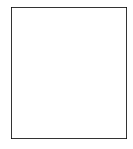

In [138]:
class_names = ['Non-Emergency vehicle', 'Emergency vehicle']
plt.figure(figsize=(12,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
x_train[1:3].shape,x_train.shape[1:],

In [ ]:
from tensorflow import keras
input_=keras.layers.Input(shape=x_train.shape[1:])
conv2d=keras.conv2d

In [ ]:
images = x_train[1:3]

batch_size, height, width, channels = images.shape

In [ ]:
images.shape

In [ ]:
img=mpimg.imread(test["image_names"][1])
print(img.shape)
plt.imshow(img) 

In [ ]:
import numpy as np

images = x_train[1:3]

batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [ ]:
outputs.shape

In [ ]:
outputs[0, :, :, 1].shape

In [ ]:
input_

In [ ]:
input_ = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
y_train[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
train = x_train[:1310]
y_label= y_train[:1310]

valid = x_train[1310]
y_valid=y_train[1310:]

In [204]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
x_train.shape,x_

In [203]:
import tensorflow as tf

In [ ]:
model.fit_generator(val)